# Imports and Data Reading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import scipy as sp
from tabulate import tabulate
import matplotlib.dates as mdates

In [2]:
df = pd.read_excel("DATA - BALANCE ECO.xlsx","GHG TOTAL = CO2ekg2018",header=None)
df.sort_index(inplace=True)

In [3]:
df = df.iloc[4:23,:]

df.columns = ["Sector","---", "Name"] + pd.date_range(start='1990', end='2020', freq='Y').tolist()
df = df.set_index("Sector")
df = df.iloc[:,1:]

In [4]:
sf = pd.read_csv("Simulated Data.csv",index_col=0)

In [5]:
df = df.drop("Name",axis=1)
df = df.reset_index()
df["Sector"].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18}, inplace=True)
df = df.set_index("Sector")

In [6]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM, Input
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import *

import keras_tuner as kt

In [7]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(df.values.reshape(-1,1))

MinMaxScaler(feature_range=(-1, 1))

In [8]:
shapedItems = {}
for i in df.index:
    shapedItems[i] = scaler.transform(df.iloc[i,:].values.reshape(-1,1))

In [9]:
seq_len = 10

def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

for i in shapedItems:
    shapedItems[i] = split_into_sequences(shapedItems[i],seq_len)

In [10]:
def get_train_test_sets(data, train_frac):
    n_train = int(data.shape[0] * train_frac)
    x_train = data[:n_train, :-1, :]
    y_train = data[:n_train, -1, :]
    x_test = data[n_train:, :-1, :]
    y_test = data[n_train:, -1, :]
    return x_train, y_train, x_test, y_test

splitData = {}
for i in shapedItems:
    x_train, y_train, x_test, y_test = get_train_test_sets(shapedItems[i], train_frac=0.8)
    splitData[i] = {}
    splitData[i]["x_train"] = x_train
    splitData[i]["y_train"] = y_train
    splitData[i]["x_test"] = x_test
    splitData[i]["y_test"] = y_test

In [11]:
print(scaler.inverse_transform(splitData[0]["y_train"]))
print(scaler.inverse_transform(splitData[0]["y_test"]))

[[54907.8]
 [52245.5]
 [49858.8]
 [49468.4]
 [50332.2]
 [50318.3]
 [49693. ]
 [48378.6]
 [47667.6]
 [46560.7]
 [46185.3]
 [46502.6]
 [46592.3]
 [46396.6]
 [46189.3]
 [47936. ]]
[[47796.3]
 [48326.7]
 [48817.3]
 [48595.1]
 [48126.7]]


In [12]:
otherscaler = MinMaxScaler(feature_range=(-1,1))
otherscaler.fit(sf.values.reshape(-1,1))

MinMaxScaler(feature_range=(-1, 1))

In [13]:
alsoshapedItems = {}
for i in sf.index:
    alsoshapedItems[i] = otherscaler.transform(sf.iloc[i,:].values.reshape(-1,1))

# This definetly wont be confusing

In [14]:
seq_len = 30

#def split_into_sequences(data, seq_len):
#    n_seq = len(data) - seq_len + 1
#    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

for i in alsoshapedItems:
    alsoshapedItems[i] = split_into_sequences(alsoshapedItems[i],seq_len)

In [15]:
#def get_train_test_sets(data, train_frac):
#    n_train = int(data.shape[0] * train_frac)
#    x_train = data[:n_train, :-1, :]
#    y_train = data[:n_train, -1, :]
#    x_test = data[n_train:, :-1, :]
#    y_test = data[n_train:, -1, :]
#    return x_train, y_train, x_test, y_test

turnoversplitData = {}
for i in alsoshapedItems:
    x_traint, y_traint, x_testt, y_testt = get_train_test_sets(alsoshapedItems[i], train_frac=0.8)
    turnoversplitData[i] = {}
    turnoversplitData[i]["x_train"] = x_traint
    turnoversplitData[i]["y_train"] = y_traint
    turnoversplitData[i]["x_test"] = x_testt
    turnoversplitData[i]["y_test"] = y_testt

In [16]:
print(otherscaler.inverse_transform(turnoversplitData[0]["y_train"]))
print(otherscaler.inverse_transform(turnoversplitData[0]["y_test"]))

[[10234.08018462]
 [10296.65624393]
 [10259.57923962]
 [10306.44236774]
 [10752.81366306]
 [10800.29703847]
 [11045.43254834]
 [11118.48389511]
 [11326.19781886]
 [11367.89221961]
 [11538.66697179]
 [11507.31002577]
 [11514.13274589]
 [11607.16983848]
 [11681.46167982]
 [11698.48402194]
 [11767.12472136]
 [11805.58005296]
 [11758.64800848]
 [11915.77732041]
 [12082.0035925 ]
 [12130.72746247]
 [12196.68042366]
 [12644.49896264]
 [12592.1914417 ]
 [12837.53370067]
 [12887.22239975]
 [12861.17201382]
 [12957.44817556]
 [13027.26045318]
 [13089.90542886]
 [13007.82603829]
 [13318.63884389]
 [13445.51387164]
 [13567.70258657]
 [13503.61036723]
 [13745.78247342]
 [13982.02777223]
 [14037.36761322]
 [14065.69223919]
 [14436.7379477 ]
 [14475.1932793 ]
 [14701.10112338]
 [15422.10413275]
 [15451.94491874]
 [15307.84079978]
 [15248.84839144]
 [14825.42624562]
 [15038.58456219]
 [15128.31366927]
 [14906.67863981]
 [14912.81219629]
 [14671.05358829]
 [14623.50129652]
 [14788.41815768]
 [15036.17

# LSTM

In [17]:
findFolder = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S"]

In [97]:
winners = []
for y in range(0,19):
    predictions = pd.DataFrame(columns=["R2","RMSE","MAPE","MAE","TOTAL"])
    for x in range(0,10):
        lmodel = keras.models.load_model(f'savedModels/lstm/{findFolder[y]}/Trial{x}/model.keras')

        y_pred = lmodel.predict(splitData[y]["x_test"],verbose=0)
        #old_pred = lmodel.predict(splitData[y]["x_train"],verbose=0)

        y_test_orig = scaler.inverse_transform(splitData[y]["y_test"].reshape(-1,1))
        y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1,1))
        #old_pred_orig = scaler.inverse_transform(old_pred.reshape(-1,1))

        mse = mean_squared_error(y_test_orig,y_pred_orig)
        mae = mean_absolute_error(y_test_orig,y_pred_orig)
        mape = mean_absolute_percentage_error(y_test_orig,y_pred_orig)*100
        r2 = r2_score(y_test_orig,y_pred_orig)
        predictions.loc[x+1] = [r2,np.sqrt(mse),mape,mae,0]

        #print("Trial{}:\nR²= {:.3f}, RMSE={:.3f}, MAPE={:.3f}%, MAE={:.3f}".format(x+1,r2,np.sqrt(mse),mape,mae))

    predictions.iloc[:,0] = predictions.iloc[:,0].rank(ascending=False)
    predictions.iloc[:,1] = predictions.iloc[:,1].rank()
    predictions.iloc[:,2] = predictions.iloc[:,2].rank()
    predictions.iloc[:,3] = predictions.iloc[:,3].rank()
    predictions.iloc[:,4] = predictions.sum(axis=1)
    predictions.iloc[:,4] = predictions.iloc[:,4].rank()
    predictions.sort_values(by="TOTAL",inplace=True)
    print(f"Model {findFolder[y]}")
    print(predictions)
    winners.append(predictions.iloc[0,:].name)
print(winners)

Model A
      R2  RMSE  MAPE   MAE  TOTAL
2    1.0   1.0   1.0   1.0    1.0
3    2.0   2.0   2.0   2.0    2.0
1    3.0   3.0   3.0   3.0    3.0
7    4.0   4.0   4.0   4.0    4.0
4    5.0   5.0   5.0   5.0    5.0
6    6.0   6.0   6.0   6.0    6.0
9    7.0   7.0   7.0   7.0    7.0
8    8.0   8.0   8.0   8.0    8.0
10   9.0   9.0   9.0   9.0    9.0
5   10.0  10.0  10.0  10.0   10.0
Model B
      R2  RMSE  MAPE   MAE  TOTAL
3    1.0   1.0   1.0   1.0    1.0
5    2.0   2.0   2.0   2.0    2.0
2    3.0   3.0   3.0   3.0    3.0
6    4.0   4.0   4.0   4.0    4.0
1    5.0   5.0   5.0   5.0    5.0
7    6.0   6.0   6.0   6.0    6.0
9    7.0   7.0   7.0   7.0    7.0
4    8.0   8.0   8.0   8.0    8.0
10   9.0   9.0   9.0   9.0    9.0
8   10.0  10.0  10.0  10.0   10.0
Model C
      R2  RMSE  MAPE   MAE  TOTAL
8    1.0   1.0   1.0   1.0    1.0
6    2.0   2.0   2.0   2.0    2.0
2    3.0   3.0   3.0   3.0    3.0
4    4.0   4.0   4.0   4.0    4.0
1    6.0   6.0   5.0   5.0    5.0
5    5.0   5.0   7.0   7

In [98]:
winnerspanda = pd.Series(winners,index=findFolder)
winnerspanda.to_csv("savedModels/GHGe LSTM Best.csv")

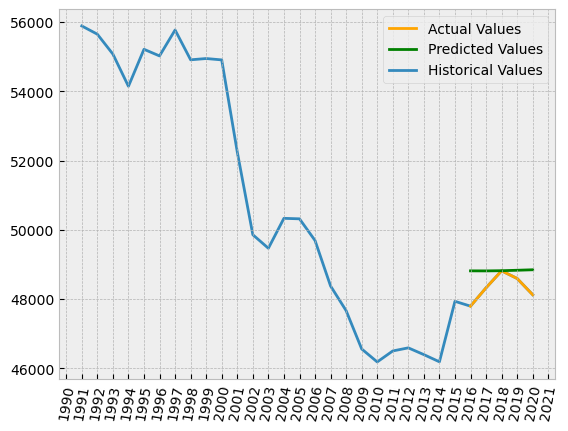

In [48]:
plt.style.use('bmh')
fig,ax = plt.subplots()

historical = df.iloc[0,:]

ax.plot(historical.tail(5).index, y_test_orig, color='orange', label='Actual Values',zorder=0)
ax.plot(historical.tail(5).index, y_pred_orig, color='green', label='Predicted Values',zorder=1)
#ax.plot(historical.iloc[-20:-4].index, old_pred_orig, color='red', label='Testing Values',zorder=1)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.tick_params(axis='x', rotation=80)

ax.plot(historical.index,historical.values,zorder=-1,label="Historical Values")
ax.legend()
plt.show()

In [130]:
winnersturnover = []
for y in range(0,13):
    predictions = pd.DataFrame(columns=["R2","RMSE","MAPE","MAE","TOTAL"])
    for x in range(0,10):
        lmodel = keras.models.load_model(f'savedModels/zTurnoverLstm/{findFolder[y]}/Trial{x}/model.keras')

        y_pred = lmodel.predict(turnoversplitData[y]["x_test"],verbose=0)
        #old_pred = lmodel.predict(turnoversplitData[y]["x_train"],verbose=0)

        y_test_orig = otherscaler.inverse_transform(turnoversplitData[y]["y_test"].reshape(-1,1))
        y_pred_orig = otherscaler.inverse_transform(y_pred.reshape(-1,1))
        #old_pred_orig = otherscaler.inverse_transform(old_pred.reshape(-1,1))

        mse = mean_squared_error(y_test_orig,y_pred_orig)
        mae = mean_absolute_error(y_test_orig,y_pred_orig)
        mape = mean_absolute_percentage_error(y_test_orig,y_pred_orig)*100
        r2 = r2_score(y_test_orig,y_pred_orig)
        predictions.loc[x+1] = [r2,np.sqrt(mse),mape,mae,0]

        #print("Trial{}:\nR²= {:.3f}, RMSE={:.3f}, MAPE={:.3f}%, MAE={:.3f}".format(x+1,r2,np.sqrt(mse),mape,mae))

    predictions.iloc[:,0] = predictions.iloc[:,0].rank(ascending=False)
    predictions.iloc[:,1] = predictions.iloc[:,1].rank()
    predictions.iloc[:,2] = predictions.iloc[:,2].rank()
    predictions.iloc[:,3] = predictions.iloc[:,3].rank()
    predictions.iloc[:,4] = predictions.sum(axis=1)
    predictions.iloc[:,4] = predictions.iloc[:,4].rank()
    predictions.sort_values(by="TOTAL",inplace=True)
    print(f"Model {findFolder[y]}")
    print(predictions)
    winnersturnover.append(predictions.iloc[0,:].name)
print(winnersturnover)

Model A
      R2  RMSE  MAPE   MAE  TOTAL
7    1.0   1.0   1.0   1.0    1.0
6    2.0   2.0   2.0   2.0    2.0
5    3.0   3.0   3.0   3.0    3.0
1    4.0   4.0   4.0   4.0    4.0
10   5.0   5.0   5.0   5.0    5.0
9    6.0   6.0   6.0   6.0    6.0
4    7.0   7.0   7.0   7.0    7.0
2    8.0   8.0   8.0   8.0    8.0
8    9.0   9.0   9.0   9.0    9.0
3   10.0  10.0  10.0  10.0   10.0
Model B
      R2  RMSE  MAPE   MAE  TOTAL
3    1.0   1.0   1.0   1.0    1.0
1    2.0   2.0   2.0   2.0    2.0
5    3.0   3.0   3.0   3.0    3.0
10   4.0   4.0   4.0   4.0    4.0
7    5.0   5.0   6.0   6.0    5.5
8    6.0   6.0   5.0   5.0    5.5
6    7.0   7.0   7.0   7.0    7.0
4    8.0   8.0   8.0   8.0    8.0
9    9.0   9.0   9.0   9.0    9.0
2   10.0  10.0  10.0  10.0   10.0
Model C
      R2  RMSE  MAPE   MAE  TOTAL
2    1.0   1.0   2.0   2.0    1.0
6    3.0   3.0   1.0   1.0    2.0
1    2.0   2.0   3.0   3.0    3.0
7    4.0   4.0   5.0   5.0    4.5
10   5.0   5.0   4.0   4.0    4.5
5    6.0   6.0   6.0   6

In [131]:
winnerspanda = pd.Series(winnersturnover,index=findFolder[0:13])
winnerspanda.to_csv("savedModels/Turnover LSTM Best.csv")

# SVM

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

In [55]:
# Theyre literally all the same I don't know why I have this here
winnersvm = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
winnersvmt = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1][0:13]
"""
winnerssvm = []
for y in range(0,19):
    predictions = pd.DataFrame(columns=["R2","RMSE","MAPE","MAE","TOTAL"])
    for x in range(0,10):
        lmodel = load(f'savedModels/svm/{findFolder[y]}/Trial{x}/model.joblib')

        y_pred = lmodel.predict(splitData[y]["x_test"].reshape(5,9))
        #old_pred = lmodel.predict(splitData[0]["x_train"])

        y_test_orig = scaler.inverse_transform(splitData[y]["y_test"].reshape(-1,1))
        y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1,1))
        #old_pred_orig = scaler.inverse_transform(old_pred.reshape(-1,1))

        mse = mean_squared_error(y_test_orig,y_pred_orig)
        mae = mean_absolute_error(y_test_orig,y_pred_orig)
        mape = mean_absolute_percentage_error(y_test_orig,y_pred_orig)*100
        r2 = r2_score(y_test_orig,y_pred_orig)
        predictions.loc[x+1] = [r2,np.sqrt(mse),mape,mae,0]

        #print("Trial{}:\nR²= {:.3f}, RMSE={:.3f}, MAPE={:.3f}%, MAE={:.3f}".format(x+1,r2,np.sqrt(mse),mape,mae))

    predictions.iloc[:,0] = predictions.iloc[:,0].rank(ascending=False)
    predictions.iloc[:,1] = predictions.iloc[:,1].rank()
    predictions.iloc[:,2] = predictions.iloc[:,2].rank()
    predictions.iloc[:,3] = predictions.iloc[:,3].rank()
    predictions.iloc[:,4] = predictions.sum(axis=1)
    predictions.iloc[:,4] = predictions.iloc[:,4].rank()
    predictions.sort_values(by="TOTAL",inplace=True)
    print(f"Model {findFolder[y]}")
    print(predictions)
    winnerssvm.append(predictions.iloc[0,:].name)
"""

'\nwinnerssvm = []\nfor y in range(0,19):\n    predictions = pd.DataFrame(columns=["R2","RMSE","MAPE","MAE","TOTAL"])\n    for x in range(0,10):\n        lmodel = load(f\'savedModels/svm/{findFolder[y]}/Trial{x}/model.joblib\')\n\n        y_pred = lmodel.predict(splitData[0]["x_test"].reshape(5,9))\n        #old_pred = lmodel.predict(splitData[0]["x_train"])\n\n        y_test_orig = scaler.inverse_transform(splitData[0]["y_test"].reshape(-1,1))\n        y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1,1))\n        #old_pred_orig = scaler.inverse_transform(old_pred.reshape(-1,1))\n\n        mse = mean_squared_error(y_test_orig,y_pred_orig)\n        mae = mean_absolute_error(y_test_orig,y_pred_orig)\n        mape = mean_absolute_percentage_error(y_test_orig,y_pred_orig)*100\n        r2 = r2_score(y_test_orig,y_pred_orig)\n        predictions.loc[x+1] = [r2,np.sqrt(mse),mape,mae,0]\n\n        #print("Trial{}:\nR²= {:.3f}, RMSE={:.3f}, MAPE={:.3f}%, MAE={:.3f}".format(x+1,r2,np.sqr

In [56]:
winnerspanda = pd.Series(winnersvm,index=findFolder)
winnerspanda.to_csv("savedModels/GHGe SVM Best.csv")

In [57]:
winnerspanda = pd.Series(winnersvmt,index=findFolder[0:13])
winnerspanda.to_csv("savedModels/Turnover SVM Best.csv")

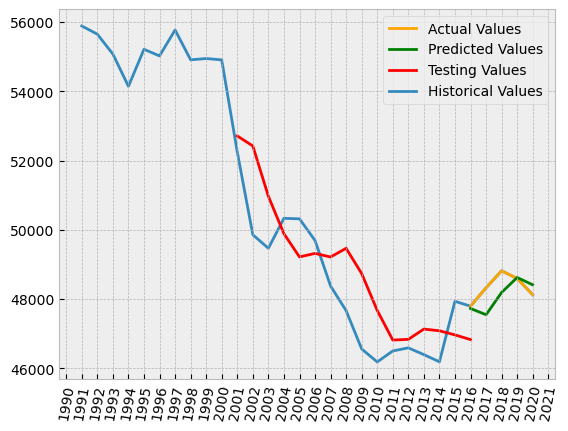

In [119]:
plt.style.use('bmh')
fig,ax = plt.subplots()

historical = df.iloc[0,:]

ax.plot(historical.tail(5).index, y_test_orig, color='orange', label='Actual Values',zorder=0)
ax.plot(historical.tail(5).index, y_pred_orig, color='green', label='Predicted Values',zorder=1)
ax.plot(historical.iloc[-20:-4].index, old_pred_orig, color='red', label='Testing Values',zorder=1)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.tick_params(axis='x', rotation=80)

ax.plot(historical.index,historical.values,zorder=-1,label="Historical Values")
ax.legend()
plt.show()

# Comparison

In [19]:
winners = pd.read_csv("savedModels/GHGe LSTM Best.csv",index_col=0)
winnersturnover = pd.read_csv("savedModels/Turnover LSTM Best.csv",index_col=0)
winnersvm = pd.read_csv("savedModels/GHGe SVM Best.csv",index_col=0)
winnersvmt = pd.read_csv("savedModels/Turnover SVM Best.csv",index_col=0)

winners = winners.to_numpy().reshape(1,-1)[0].tolist() # This really is how you have to reverse engineer the original list, I'm not sure why it's so long.
winnersturnover = winnersturnover.to_numpy().reshape(1,-1)[0].tolist()
winnersvm = winnersvm.to_numpy().reshape(1,-1)[0].tolist()
winnersvmt = winnersvmt.to_numpy().reshape(1,-1)[0].tolist()

In [20]:
findFolder = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S"]


Model A


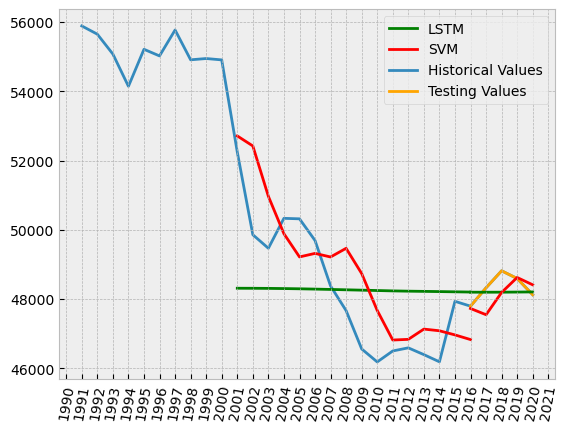

            R2        RMSE      MAPE         MAE  TOTAL
LSTM -0.136243  379.539272  0.669412  324.214531    0.0
SVM  -0.708837  465.448194  0.737106  357.121485    0.0
       R2  RMSE  MAPE  MAE  TOTAL
LSTM  1.0   1.0   1.0  1.0    1.0
SVM   2.0   2.0   2.0  2.0    2.0 

Model B


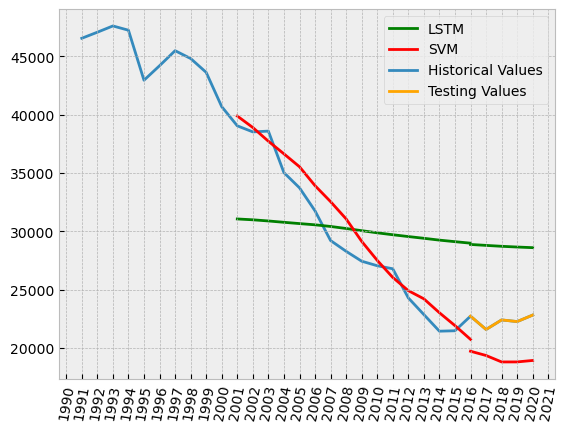

              R2         RMSE       MAPE          MAE  TOTAL
LSTM -212.009863  6380.091363  28.504404  6362.780000    0.0
SVM   -55.494239  3285.709203  14.428318  3234.365831    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model C


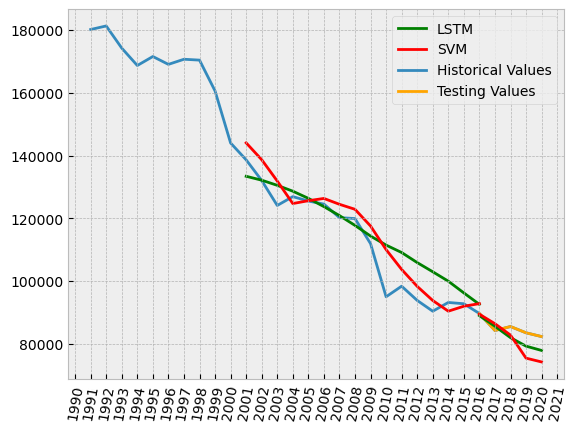

            R2         RMSE      MAPE          MAE  TOTAL
LSTM -0.640089  3239.531960  3.392868  2848.986875    0.0
SVM  -3.464113  5344.611441  5.100275  4255.644656    0.0
       R2  RMSE  MAPE  MAE  TOTAL
LSTM  1.0   1.0   1.0  1.0    1.0
SVM   2.0   2.0   2.0  2.0    2.0 

Model D


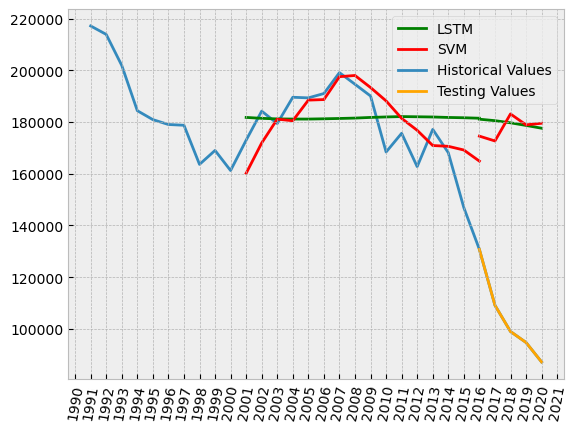

             R2          RMSE       MAPE           MAE  TOTAL
LSTM -24.876730  76644.960081  75.559433  75368.418125    0.0
SVM  -24.238377  75693.679478  74.296396  73600.317584    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model E


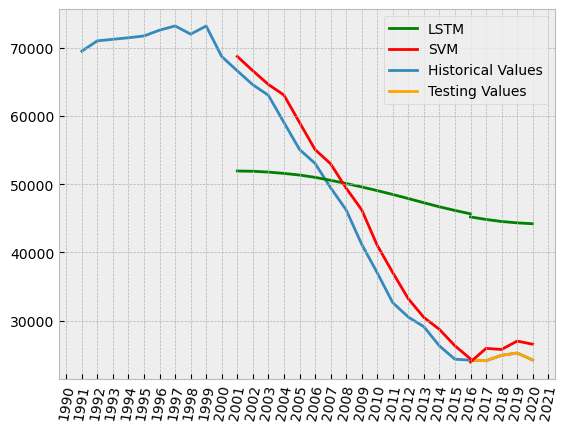

               R2          RMSE      MAPE           MAE  TOTAL
LSTM -1978.624394  20098.550994  81.96962  20086.398125    0.0
SVM    -11.267997   1582.195653   5.71443   1400.887173    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model F


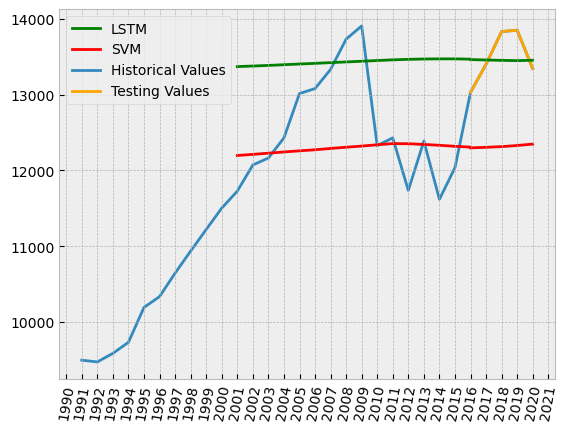

             R2         RMSE      MAPE          MAE  TOTAL
LSTM  -0.041481   318.798174  2.041309   275.944766    0.0
SVM  -14.058881  1212.234141  8.644377  1172.653337    0.0
       R2  RMSE  MAPE  MAE  TOTAL
LSTM  1.0   1.0   1.0  1.0    1.0
SVM   2.0   2.0   2.0  2.0    2.0 

Model G


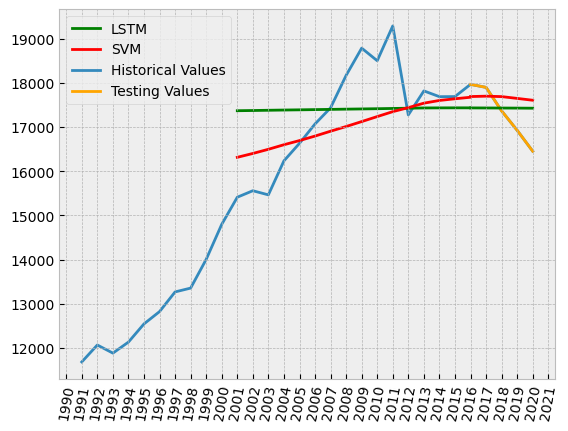

            R2        RMSE      MAPE         MAE  TOTAL
LSTM -0.027169  584.037743  2.965430  507.966094    0.0
SVM  -0.248902  643.997384  3.158098  534.977514    0.0
       R2  RMSE  MAPE  MAE  TOTAL
LSTM  1.0   1.0   1.0  1.0    1.0
SVM   2.0   2.0   2.0  2.0    2.0 

Model H


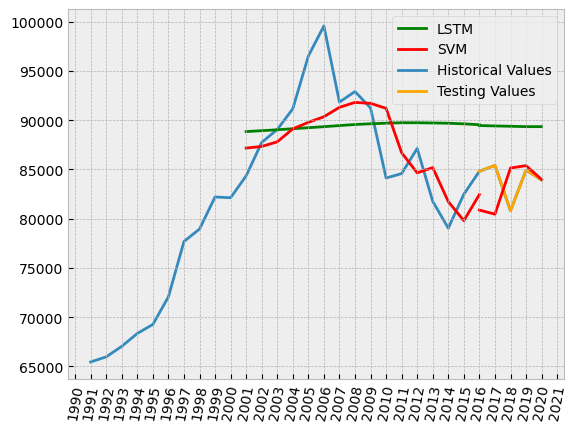

             R2         RMSE      MAPE          MAE  TOTAL
LSTM -10.673174  5655.372060  6.484471  5410.361875    0.0
SVM   -3.308968  3436.001422  3.278108  2744.267331    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model I


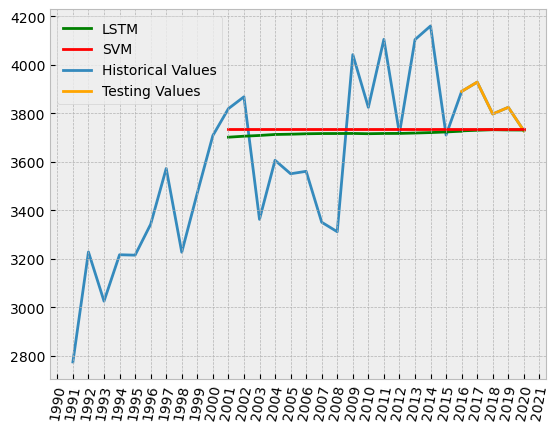

            R2        RMSE      MAPE         MAE  TOTAL
LSTM -2.182461  125.437155  2.689605  104.362598    0.0
SVM  -1.930633  120.371982  2.599069  100.820000    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model J


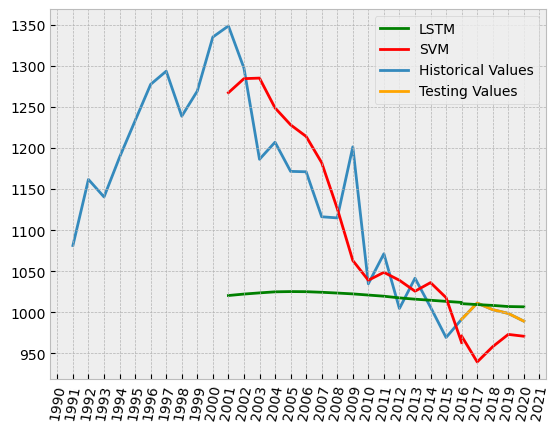

             R2       RMSE      MAPE        MAE  TOTAL
LSTM  -1.405242  12.379748  1.042906  10.364363    0.0
SVM  -25.853032  41.364625  3.605945  36.168204    0.0
       R2  RMSE  MAPE  MAE  TOTAL
LSTM  1.0   1.0   1.0  1.0    1.0
SVM   2.0   2.0   2.0  2.0    2.0 

Model K


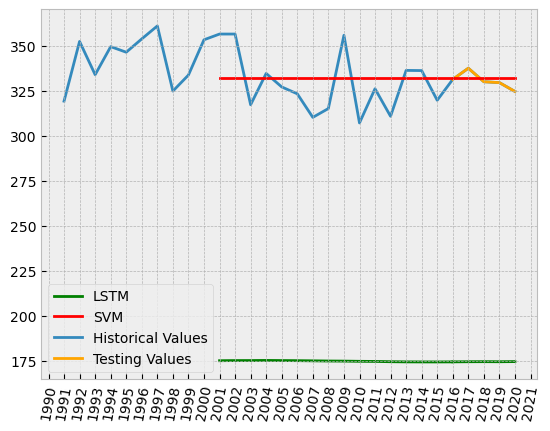

               R2        RMSE       MAPE         MAE  TOTAL
LSTM -1423.413328  156.222048  47.217535  156.166511    0.0
SVM     -0.086870    4.315322   1.059960    3.500000    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model L


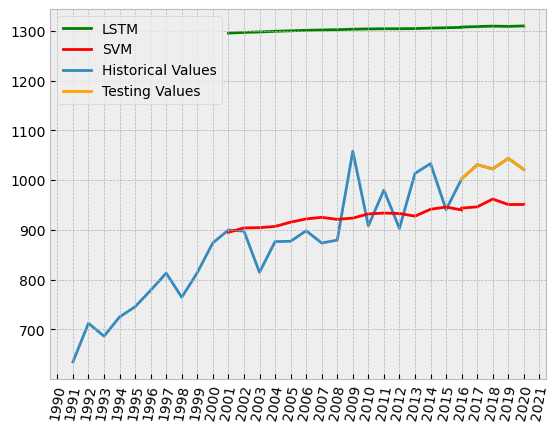

              R2        RMSE       MAPE         MAE  TOTAL
LSTM -443.221150  284.955017  27.818562  284.648916    0.0
SVM   -29.452687   74.608704   7.152665   73.391358    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model M


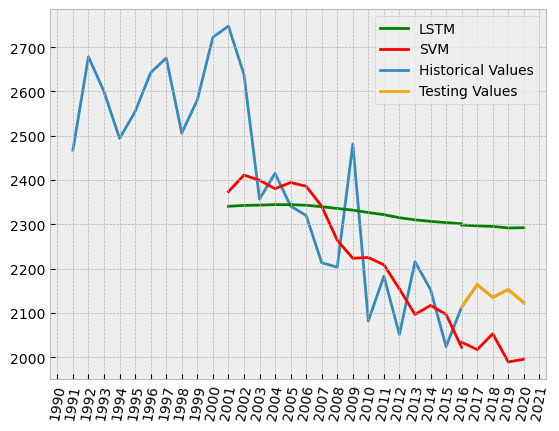

             R2        RMSE      MAPE         MAE  TOTAL
LSTM -70.604176  158.434176  7.363367  157.239238    0.0
SVM  -43.195477  124.471122  5.591955  119.760130    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model N


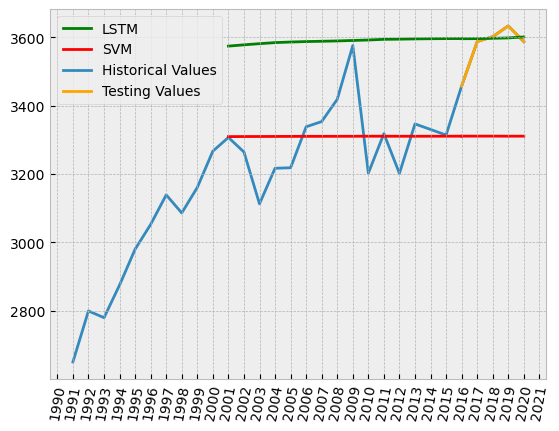

             R2        RMSE      MAPE         MAE  TOTAL
LSTM  -0.135003   64.376109  1.146875   40.190977    0.0
SVM  -18.872064  269.369068  7.318908  262.495438    0.0
       R2  RMSE  MAPE  MAE  TOTAL
LSTM  1.0   1.0   1.0  1.0    1.0
SVM   2.0   2.0   2.0  2.0    2.0 

Model O


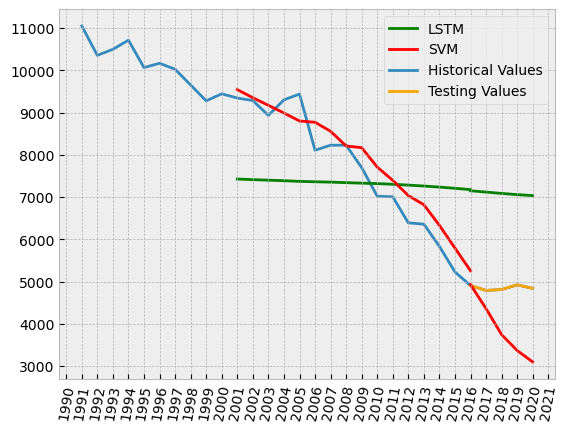

               R2         RMSE       MAPE          MAE  TOTAL
LSTM -1827.706522  2235.908250  46.052866  2234.926211    0.0
SVM   -494.264874  1163.592023  19.823678   962.704366    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model P


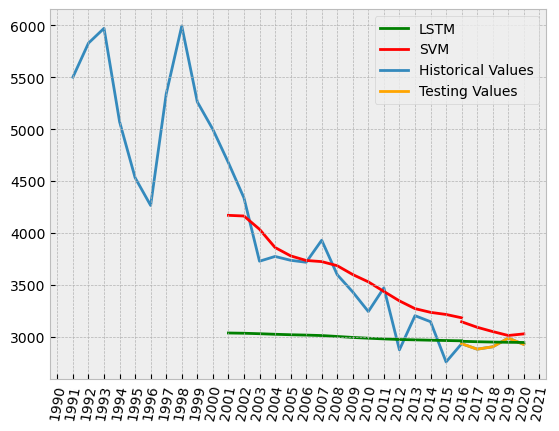

             R2        RMSE      MAPE         MAE  TOTAL
LSTM  -0.541942   44.076340  1.367247   39.916416    0.0
SVM  -18.246429  155.720779  4.769304  138.979239    0.0
       R2  RMSE  MAPE  MAE  TOTAL
LSTM  1.0   1.0   1.0  1.0    1.0
SVM   2.0   2.0   2.0  2.0    2.0 

Model Q


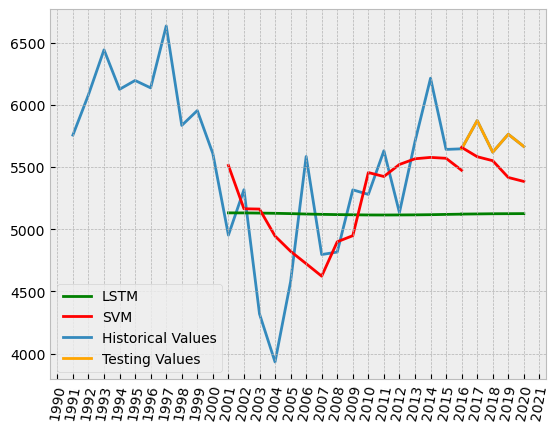

             R2        RMSE       MAPE         MAE  TOTAL
LSTM -39.844001  597.459031  10.303031  590.073633    0.0
SVM   -5.617288  240.482787   3.474000  199.947746    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model R


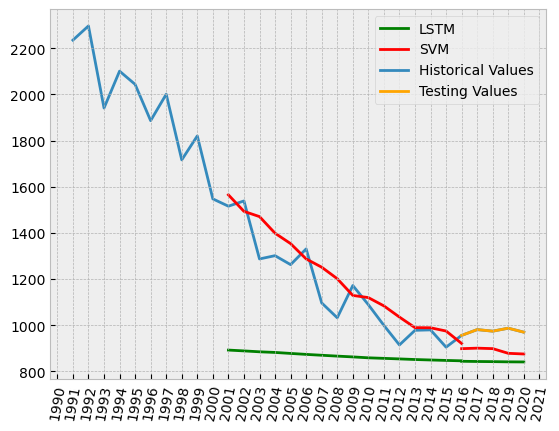

              R2        RMSE       MAPE         MAE  TOTAL
LSTM -153.083255  131.963970  13.496724  131.484412    0.0
SVM   -63.266227   85.225401   8.556758   83.432969    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model S


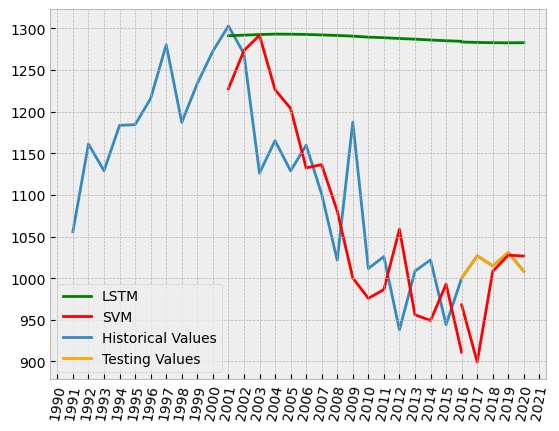

              R2        RMSE       MAPE         MAE  TOTAL
LSTM -544.387294  267.181513  26.284439  266.926670    0.0
SVM   -25.986268   59.432679   3.675257   37.488541    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 



In [21]:
plt.style.use('bmh')
bestforghge = []
for y in range(0,19):
    predictions = pd.DataFrame(columns=["R2","RMSE","MAPE","MAE","TOTAL"])

    # LSTM
    lmodel = keras.models.load_model(f'savedModels/lstm/{findFolder[y]}/Trial{winners[y] - 1}/model.keras')

    y_pred = lmodel.predict(splitData[y]["x_test"],verbose=0)
    old_pred = lmodel.predict(splitData[y]["x_train"],verbose=0)

    y_test_orig = scaler.inverse_transform(splitData[y]["y_test"].reshape(-1,1))
    y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1,1))
    old_pred_orig = scaler.inverse_transform(old_pred.reshape(-1,1))

    mse = mean_squared_error(y_test_orig,y_pred_orig)
    mae = mean_absolute_error(y_test_orig,y_pred_orig)
    mape = mean_absolute_percentage_error(y_test_orig,y_pred_orig)*100
    r2 = r2_score(y_test_orig,y_pred_orig)
    predictions.loc["LSTM"] = [r2,np.sqrt(mse),mape,mae,0]

    fig,ax = plt.subplots()

    historical = df.iloc[y,:]

    ax.plot(historical.tail(5).index, y_pred_orig, color='green', label='LSTM',zorder=1)
    ax.plot(historical.iloc[-20:-4].index, old_pred_orig, color='green',zorder=1)

    # SVM
    lmodel = load(f'savedModels/svm/{findFolder[y]}/Trial{winnersvm[y] - 1}/model.joblib')

    y_pred = lmodel.predict(splitData[y]["x_test"].reshape(5,9))
    old_pred = lmodel.predict(splitData[y]["x_train"].reshape(16,9))

    y_test_orig = scaler.inverse_transform(splitData[y]["y_test"].reshape(-1,1))
    y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1,1))
    old_pred_orig = scaler.inverse_transform(old_pred.reshape(-1,1))

    mse = mean_squared_error(y_test_orig,y_pred_orig)
    mae = mean_absolute_error(y_test_orig,y_pred_orig)
    mape = mean_absolute_percentage_error(y_test_orig,y_pred_orig)*100
    r2 = r2_score(y_test_orig,y_pred_orig)
    predictions.loc["SVM"] = [r2,np.sqrt(mse),mape,mae,0]

    ax.plot(historical.tail(5).index, y_pred_orig, color='red', label='SVM',zorder=1)
    ax.plot(historical.iloc[-20:-4].index, old_pred_orig, color='red',zorder=1)

    #print("Trial{}:\nR²= {:.3f}, RMSE={:.3f}, MAPE={:.3f}%, MAE={:.3f}".format(x+1,r2,np.sqrt(mse),mape,mae))

    print(f"Model {findFolder[y]}")

    #ax.vlines(historical.tail(5).index[0],min(historical.values),max(historical.values),colors="black")
    ax.plot(historical.index,historical.values,zorder=-1,label="Historical Values")
    ax.plot(historical.tail(5).index, y_test_orig, color='orange', label='Testing Values',zorder=0)

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.tick_params(axis='x', rotation=80)
    ax.legend()
    plt.show()

    print(predictions)
    
    predictions.iloc[:,0] = predictions.iloc[:,0].rank(ascending=False)
    predictions.iloc[:,1] = predictions.iloc[:,1].rank()
    predictions.iloc[:,2] = predictions.iloc[:,2].rank()
    predictions.iloc[:,3] = predictions.iloc[:,3].rank()
    predictions.iloc[:,4] = predictions.sum(axis=1)
    predictions.iloc[:,4] = predictions.iloc[:,4].rank()
    predictions.sort_values(by="TOTAL",inplace=True)
    bestforghge.append(predictions.iloc[0,:].name)
    print(predictions,"\n")

Model A


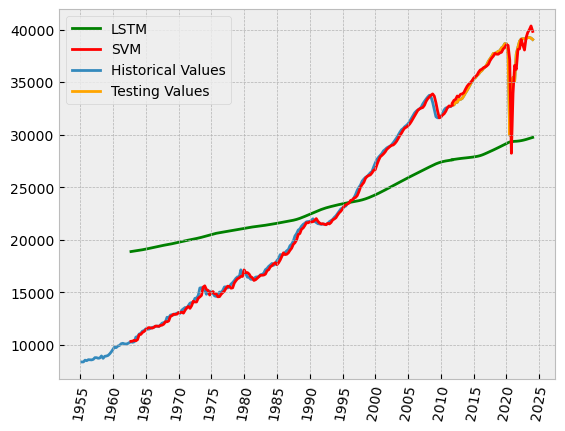

             R2        RMSE       MAPE          MAE  TOTAL
LSTM -11.553553  7978.43524  21.135155  7767.654096    0.0
SVM    0.559376  1494.74992   1.900481   657.938953    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model B


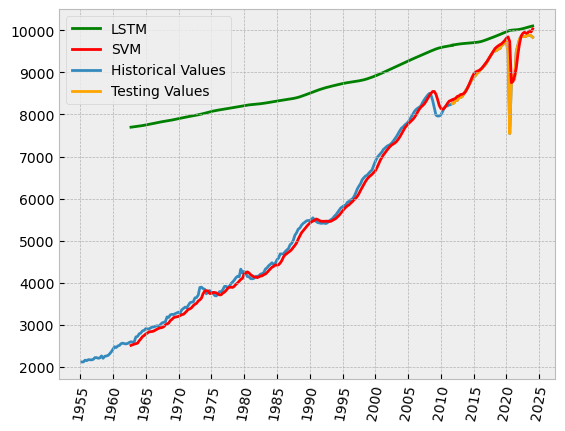

            R2        RMSE      MAPE         MAE  TOTAL
LSTM -1.201879  841.682515  7.954462  695.497115    0.0
SVM   0.667680  326.986657  1.331437  113.590051    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model C


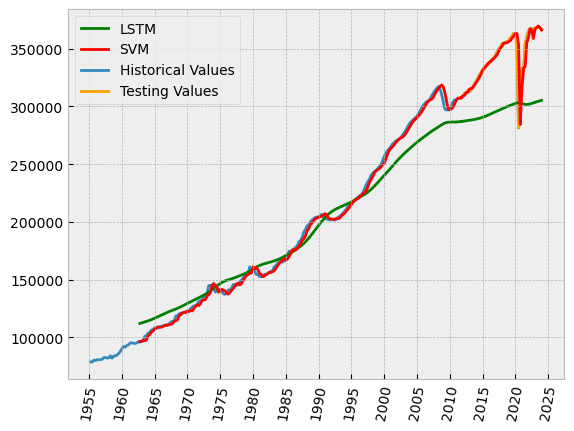

            R2          RMSE       MAPE           MAE  TOTAL
LSTM -4.173918  48117.103741  13.213259  45847.317948    0.0
SVM   0.638040  12726.822871   1.412653   4511.841295    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model D


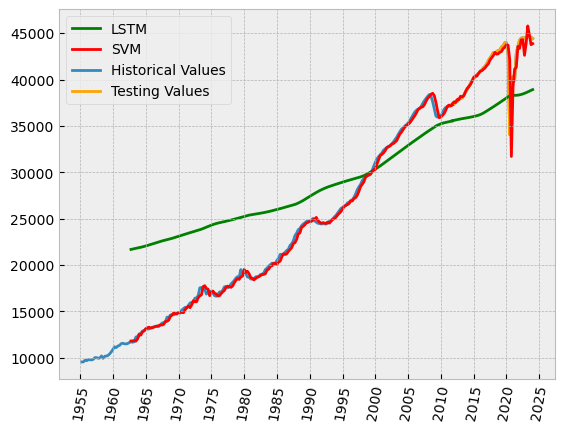

            R2         RMSE       MAPE          MAE  TOTAL
LSTM -2.321540  4666.549487  10.514870  4411.277637    0.0
SVM   0.557391  1703.476491   1.699935   671.154093    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model E


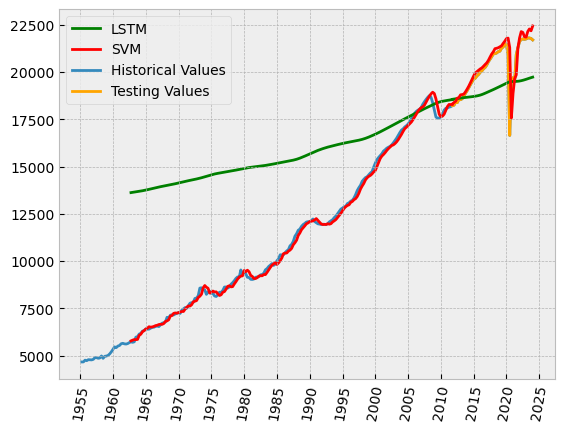

            R2         RMSE      MAPE          MAE  TOTAL
LSTM -0.444280  1503.445291  6.169762  1276.207099    0.0
SVM   0.613736   777.506770  1.879206   362.229944    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model F


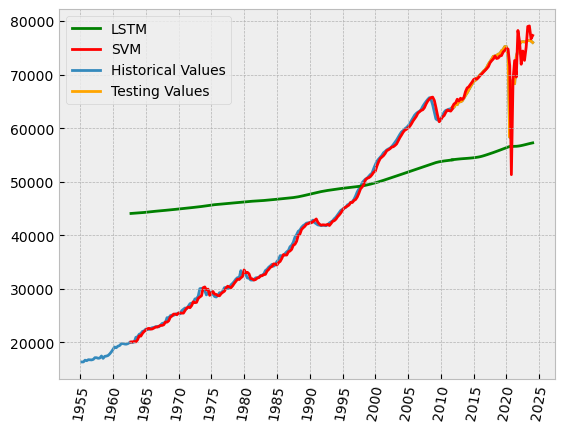

             R2          RMSE       MAPE           MAE  TOTAL
LSTM -11.820253  15692.281503  21.296550  15246.117749    0.0
SVM    0.411222   3362.898316   2.178215   1495.981028    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model G


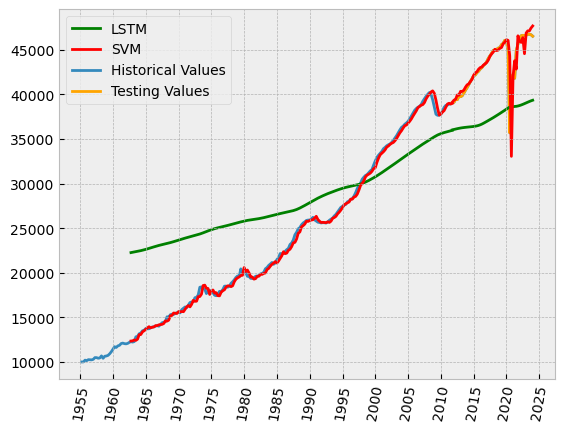

            R2         RMSE       MAPE          MAE  TOTAL
LSTM -4.295069  6174.332088  13.518516  5934.451418    0.0
SVM   0.532286  1835.034754   1.743571   717.986791    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model H


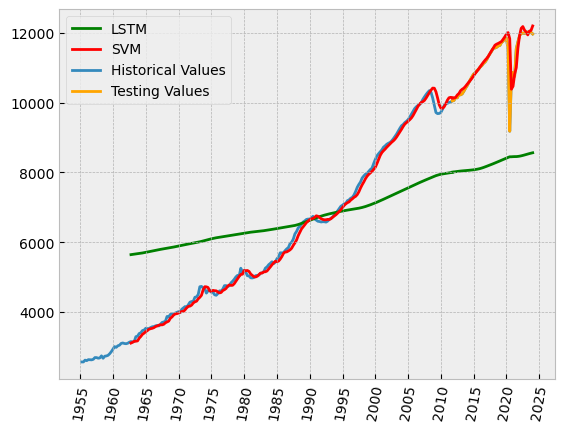

             R2         RMSE       MAPE          MAE  TOTAL
LSTM -17.118871  2936.536178  25.631180  2879.902453    0.0
SVM    0.659309   402.670586   1.373753   142.477215    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model I


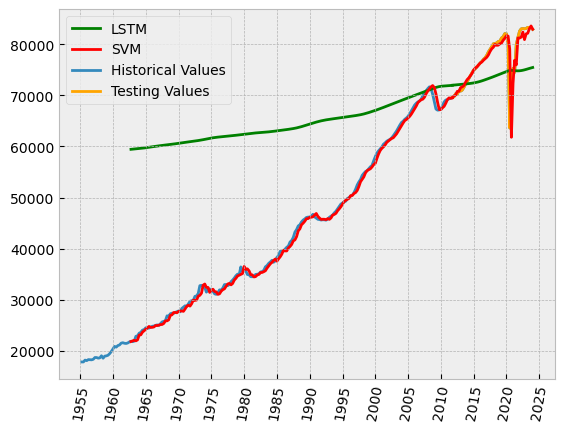

            R2         RMSE      MAPE          MAE  TOTAL
LSTM -0.272624  5394.064623  5.801192  4574.741382    0.0
SVM   0.608968  2990.006807  1.638234  1201.270339    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model J


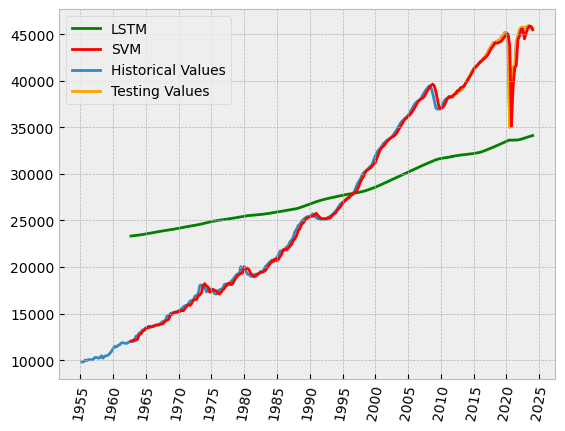

             R2         RMSE       MAPE          MAE  TOTAL
LSTM -12.976037  9841.490388  22.348641  9598.598540    0.0
SVM    0.637029  1586.006577   1.484039   595.004495    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model K


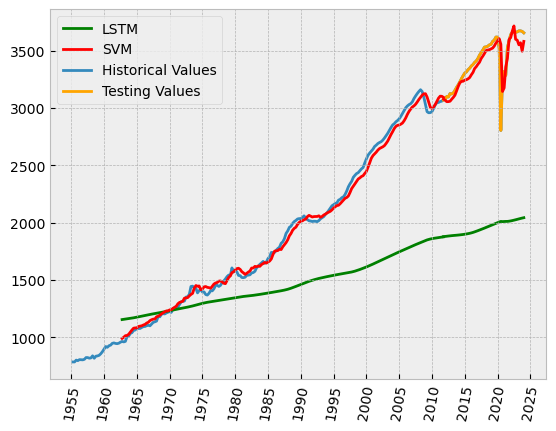

             R2         RMSE       MAPE          MAE  TOTAL
LSTM -46.959775  1459.051991  42.423207  1448.458455    0.0
SVM    0.646982   125.178669   2.171714    71.196587    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model L


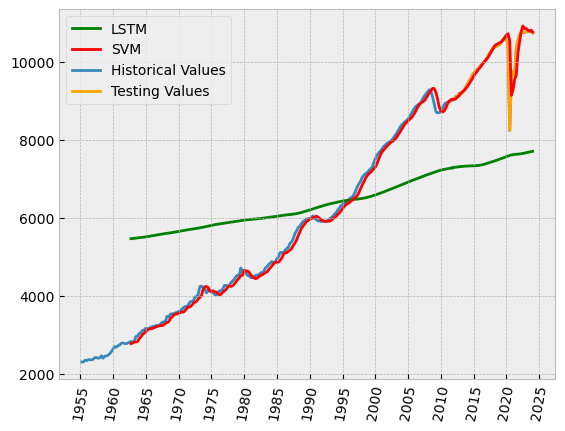

             R2         RMSE       MAPE          MAE  TOTAL
LSTM -16.411504  2584.808719  25.049356  2529.296729    0.0
SVM    0.653128   364.833810   1.404491   131.341841    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 

Model M


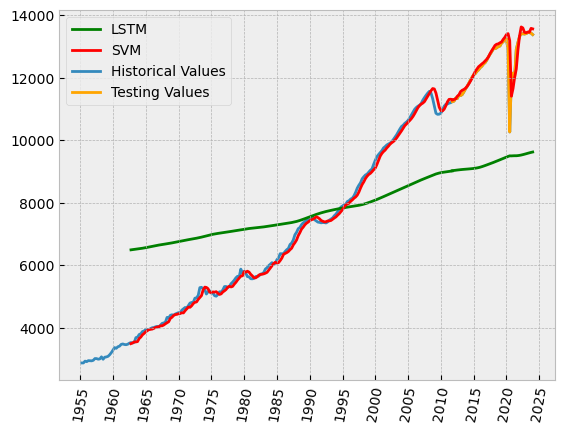

             R2         RMSE       MAPE          MAE  TOTAL
LSTM -16.469429  3223.186609  25.133899  3157.899316    0.0
SVM    0.658651   450.552509   1.419519   165.272582    0.0
       R2  RMSE  MAPE  MAE  TOTAL
SVM   1.0   1.0   1.0  1.0    1.0
LSTM  2.0   2.0   2.0  2.0    2.0 



In [22]:
plt.style.use('bmh')
sf.columns = pd.date_range(start='1955', end='2024', freq='Q').tolist()
bestforturnover = []
for y in range(0,13):
    predictions = pd.DataFrame(columns=["R2","RMSE","MAPE","MAE","TOTAL"])

    # LSTM
    lmodel = keras.models.load_model(f'savedModels/zTurnoverLstm/{findFolder[y]}/Trial{winners[y] - 1}/model.keras')

    y_pred = lmodel.predict(turnoversplitData[y]["x_test"],verbose=0)
    old_pred = lmodel.predict(turnoversplitData[y]["x_train"],verbose=0)

    y_test_orig = otherscaler.inverse_transform(turnoversplitData[y]["y_test"].reshape(-1,1))
    y_pred_orig = otherscaler.inverse_transform(y_pred.reshape(-1,1))
    old_pred_orig = otherscaler.inverse_transform(old_pred.reshape(-1,1))

    mse = mean_squared_error(y_test_orig,y_pred_orig)
    mae = mean_absolute_error(y_test_orig,y_pred_orig)
    mape = mean_absolute_percentage_error(y_test_orig,y_pred_orig)*100
    r2 = r2_score(y_test_orig,y_pred_orig)
    predictions.loc["LSTM"] = [r2,np.sqrt(mse),mape,mae,0]

    fig,ax = plt.subplots()

    historical = sf.iloc[y,:]

    ax.plot(historical.tail(50).index, y_pred_orig, color='green', label='LSTM',zorder=1)
    ax.plot(historical.iloc[30:227].index, old_pred_orig, color='green',zorder=1)

    # SVM
    lmodel = load(f'savedModels/zTurnoverSvm/{findFolder[y]}/Trial{winnersvm[y] - 1}/model.joblib')

    y_pred = lmodel.predict(turnoversplitData[y]["x_test"].reshape(50,29))
    old_pred = lmodel.predict(turnoversplitData[y]["x_train"].reshape(197,29))

    y_test_orig = otherscaler.inverse_transform(turnoversplitData[y]["y_test"].reshape(-1,1))
    y_pred_orig = otherscaler.inverse_transform(y_pred.reshape(-1,1))
    old_pred_orig = otherscaler.inverse_transform(old_pred.reshape(-1,1))

    mse = mean_squared_error(y_test_orig,y_pred_orig)
    mae = mean_absolute_error(y_test_orig,y_pred_orig)
    mape = mean_absolute_percentage_error(y_test_orig,y_pred_orig)*100
    r2 = r2_score(y_test_orig,y_pred_orig)
    predictions.loc["SVM"] = [r2,np.sqrt(mse),mape,mae,0]

    ax.plot(historical.tail(50).index, y_pred_orig, color='red', label='SVM',zorder=1)
    ax.plot(historical.iloc[30:227].index, old_pred_orig, color='red',zorder=1)

    #print("Trial{}:\nR²= {:.3f}, RMSE={:.3f}, MAPE={:.3f}%, MAE={:.3f}".format(x+1,r2,np.sqrt(mse),mape,mae))

    print(f"Model {findFolder[y]}")

    #ax.vlines(historical.tail(50).index[0],min(historical.values),max(historical.values),colors="black")
    ax.plot(historical.index,historical.values,zorder=-1,label="Historical Values")
    ax.plot(historical.tail(50).index, y_test_orig, color='orange', label='Testing Values',zorder=0)
    
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.tick_params(axis='x', rotation=80)
    ax.legend()
    plt.show()

    print(predictions)
    
    predictions.iloc[:,0] = predictions.iloc[:,0].rank(ascending=False)
    predictions.iloc[:,1] = predictions.iloc[:,1].rank()
    predictions.iloc[:,2] = predictions.iloc[:,2].rank()
    predictions.iloc[:,3] = predictions.iloc[:,3].rank()
    predictions.iloc[:,4] = predictions.sum(axis=1)
    predictions.iloc[:,4] = predictions.iloc[:,4].rank()
    predictions.sort_values(by="TOTAL",inplace=True)
    bestforturnover.append(predictions.iloc[0,:].name)
    print(predictions,"\n")

In [23]:
predictionchart = pd.DataFrame(columns=["Sector"]+pd.date_range(start='2011-09', end='2030', freq='Q').tolist())
predictionchart = predictionchart.set_index("Sector")

ghgechart = pd.DataFrame(columns=["Sector"]+pd.date_range(start='2014', end='2030', freq='Y').tolist())
ghgechart = ghgechart.set_index("Sector")

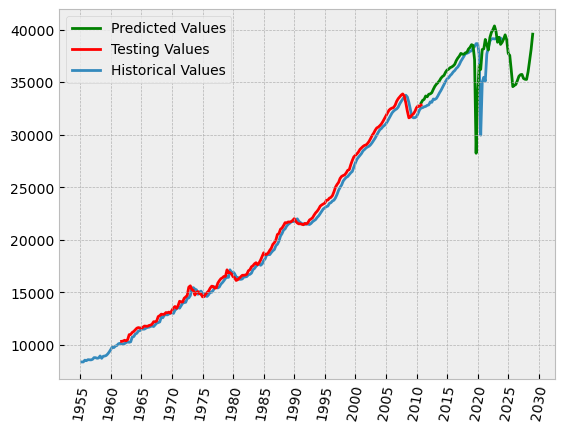

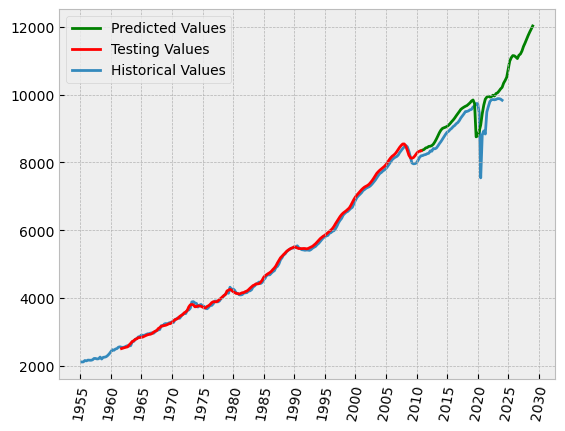

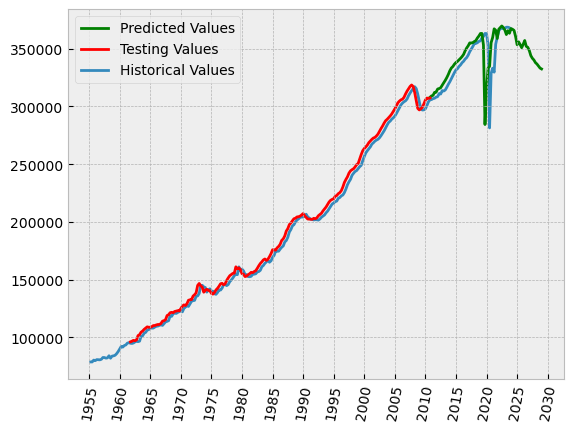

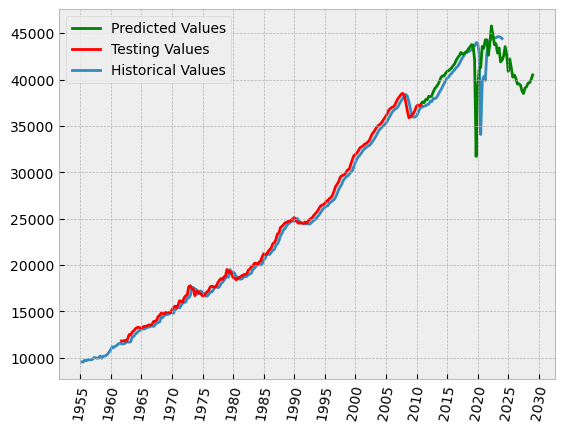

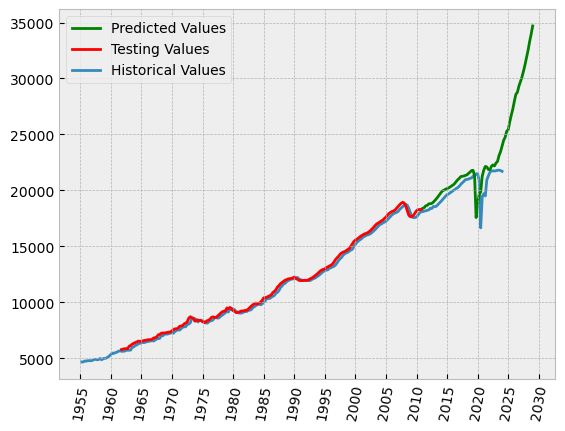

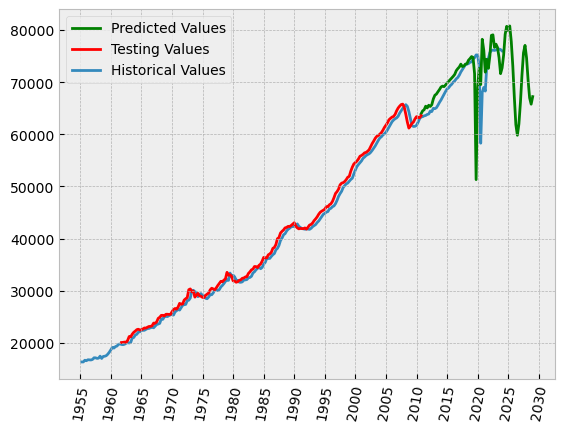

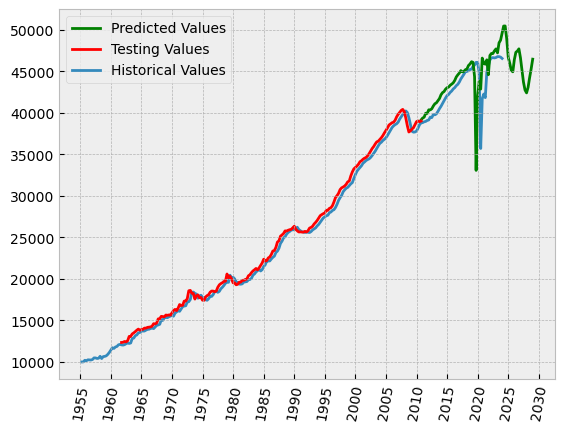

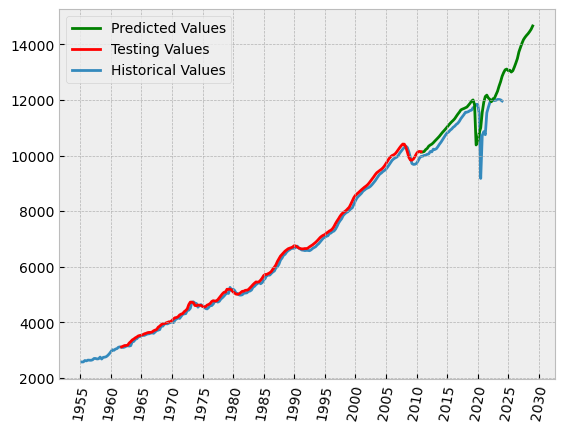

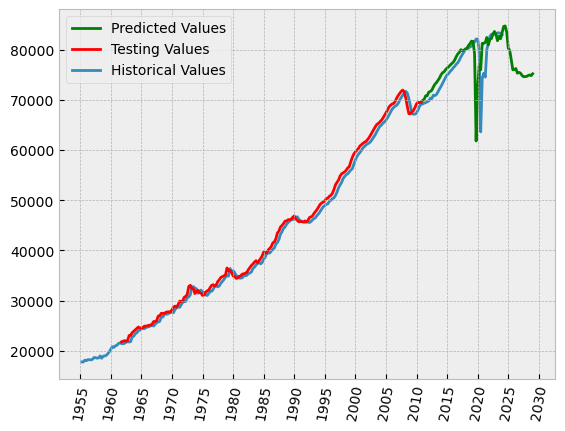

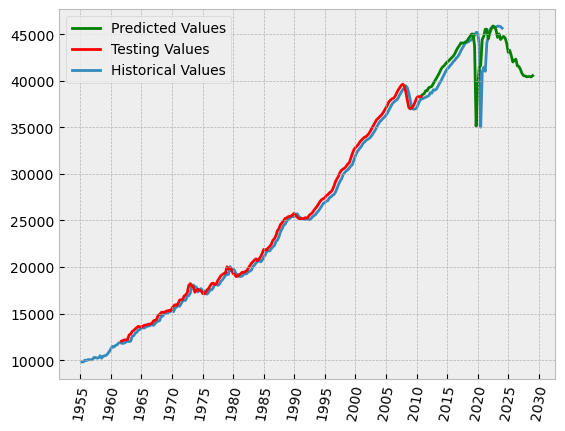

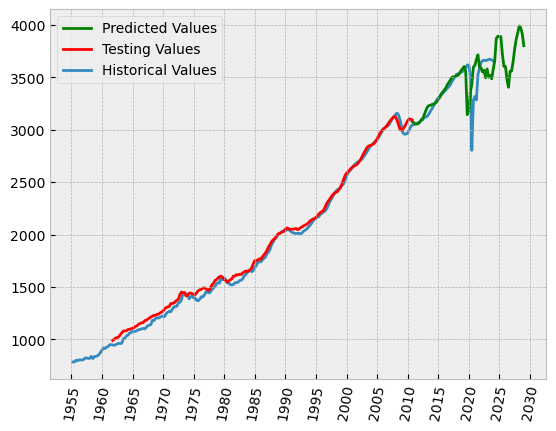

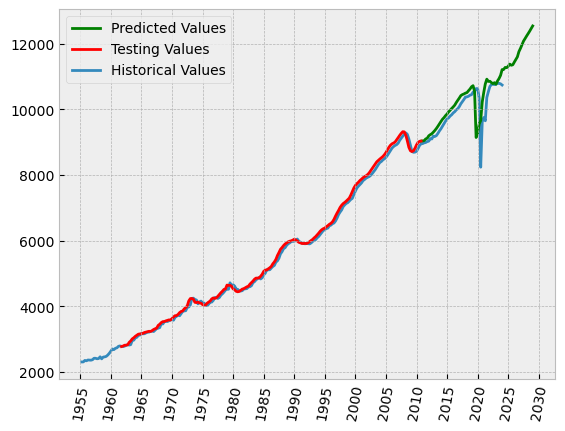

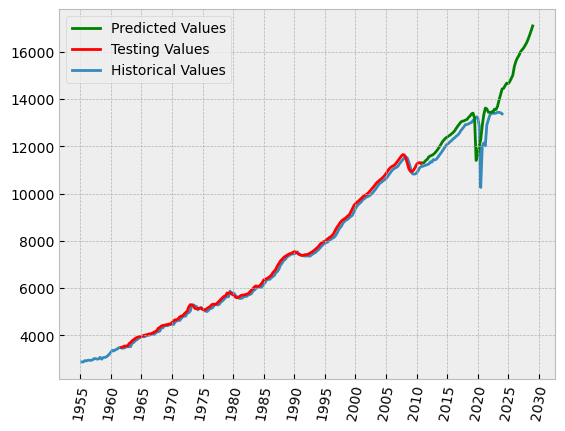

In [24]:
# Turnover
for y in range(0,13):
    next = turnoversplitData[y]["x_test"][-1]
    match bestforturnover[y]:
        case "LSTM": 
            lmodel = keras.models.load_model(f'savedModels/zTurnoverLstm/{findFolder[y]}/Trial{winners[y] - 1}/model.keras')
            y_pred = lmodel.predict(turnoversplitData[y]["x_test"],verbose=0)
            old_pred = lmodel.predict(turnoversplitData[y]["x_train"],verbose=0)
        case "SVM": 
            lmodel = load(f'savedModels/zTurnoverSvm/{findFolder[y]}/Trial{winners[y] - 1}/model.joblib')
            y_pred = lmodel.predict(turnoversplitData[y]["x_test"].reshape(50,29))
            old_pred = lmodel.predict(turnoversplitData[y]["x_train"].reshape(197,29)) 
        case _: raise("Update this bit if you're gonna add a new model!")



    for x in range(0,24):
        next = np.append(next,y_pred[-1])
        next = np.delete(next,0).reshape(-1,1)

        match bestforturnover[y]:
            case "LSTM": y_pred = np.append(y_pred,lmodel.predict(np.array([next]),verbose=0)).reshape(-1,1)
            case "SVM": y_pred = np.append(y_pred,lmodel.predict(np.array([next]).reshape(1,29))).reshape(-1,1)
            case _: raise("Woops")

    y_test_orig = otherscaler.inverse_transform(turnoversplitData[y]["y_test"].reshape(-1,1))
    y_pred_orig = otherscaler.inverse_transform(y_pred.reshape(-1,1))
    old_pred_orig = otherscaler.inverse_transform(old_pred.reshape(-1,1))


    fig,ax = plt.subplots()

    historical = sf.iloc[y,:]

    times = sf.iloc[0,:].index.tolist() + pd.date_range(start='2024', end='2029', freq='Q').tolist()

    ax.plot(times[-74:], y_pred_orig, color='green', label='Predicted Values', zorder=1)
    ax.plot(historical.iloc[26:223].index, old_pred_orig, color='red', label='Testing Values', zorder=1)
    ax.plot(historical.index,historical.values,zorder=-1,label="Historical Values")
    #ax.plot(historical.tail(50).index, y_test_orig, color='orange', label='Actual Values',zorder=0)
    predictionchart.loc[findFolder[y]] = y_pred_orig.reshape(74)
    
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.tick_params(axis='x', rotation=80)
    ax.legend()
    plt.show()

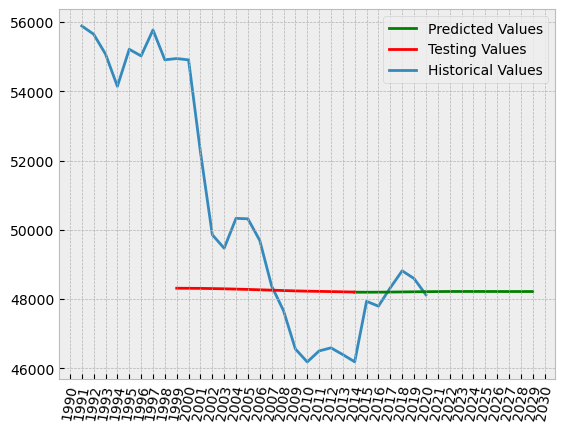

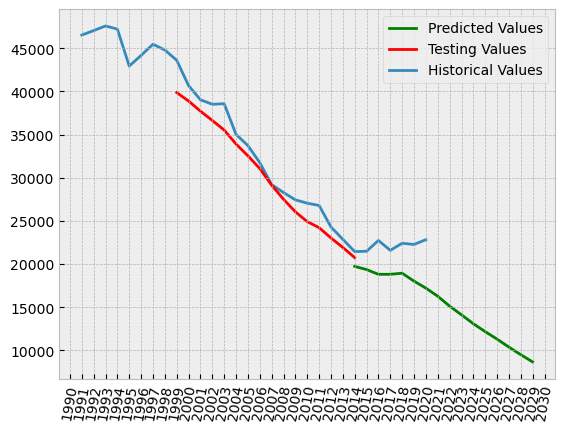

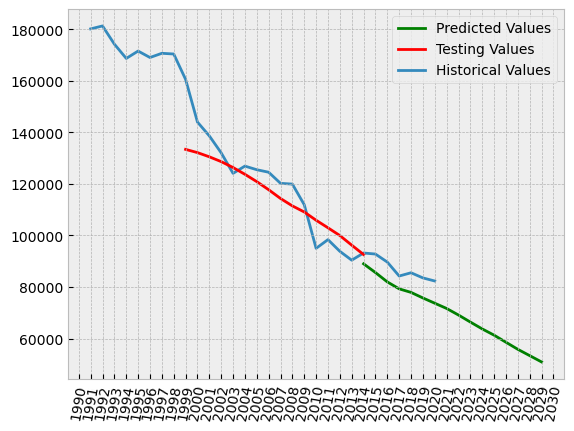

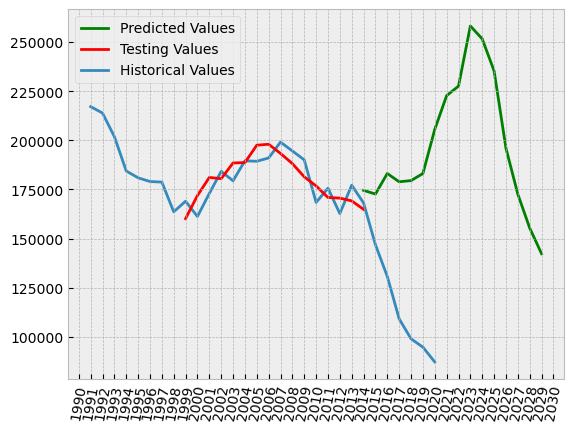

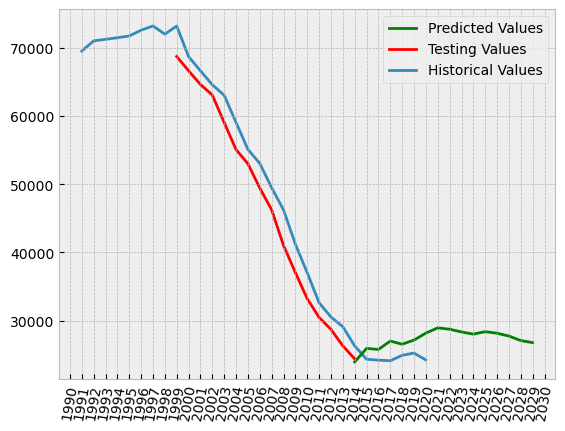

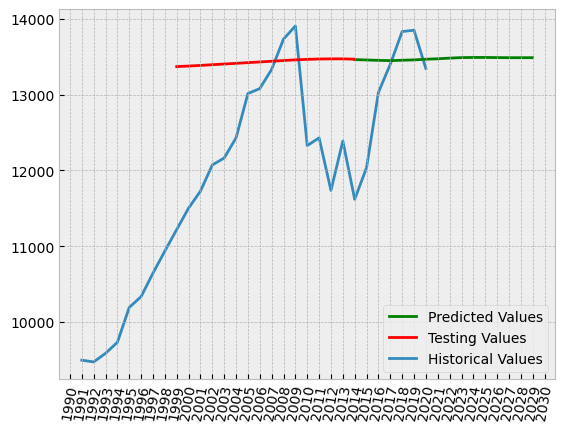

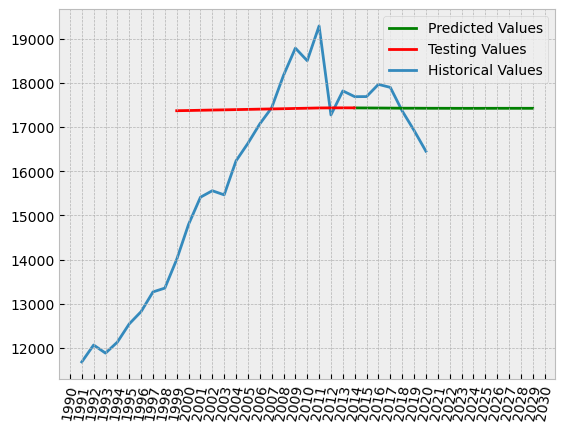

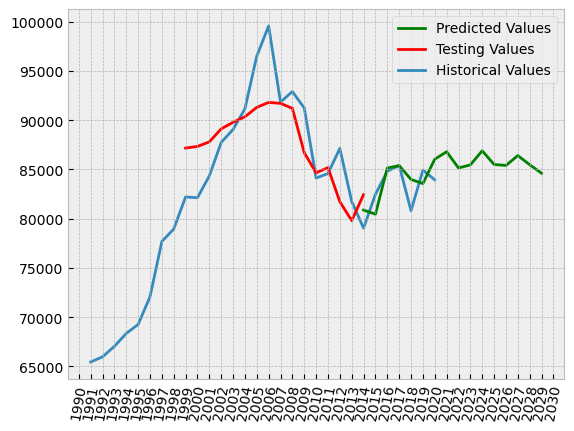

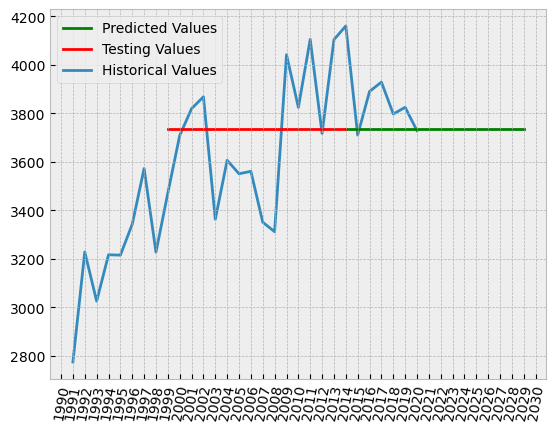

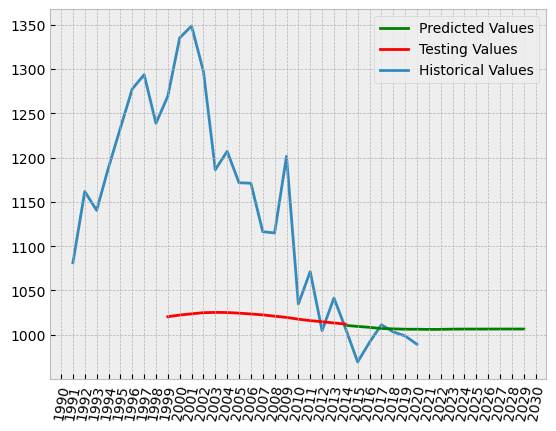

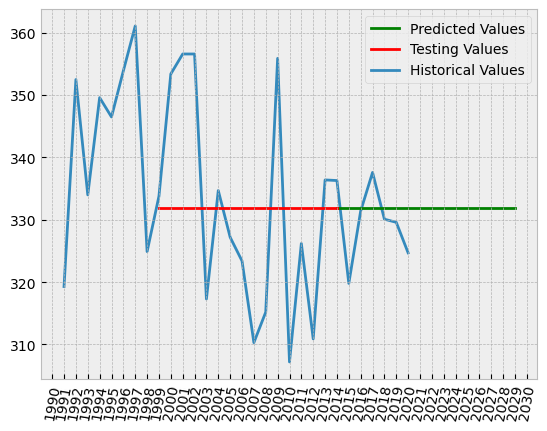

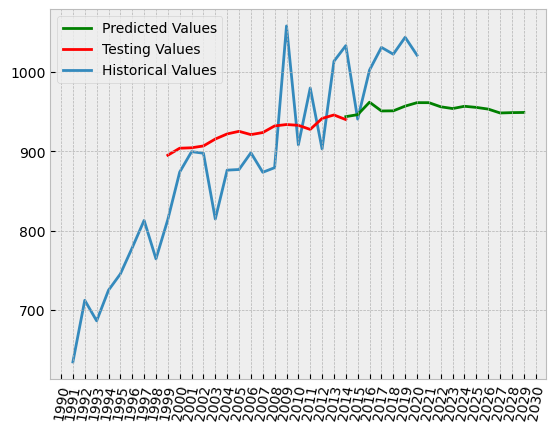

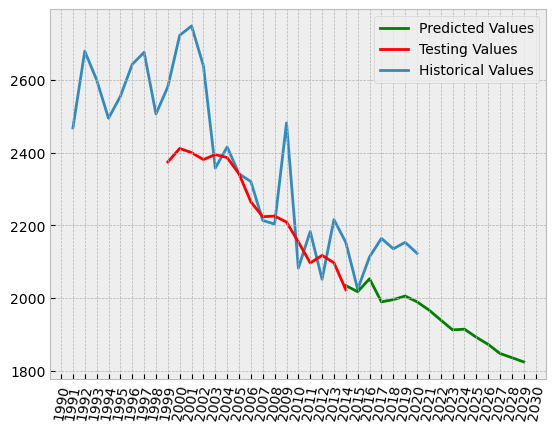

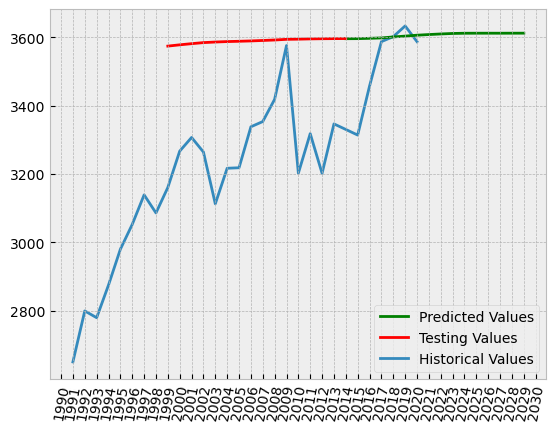

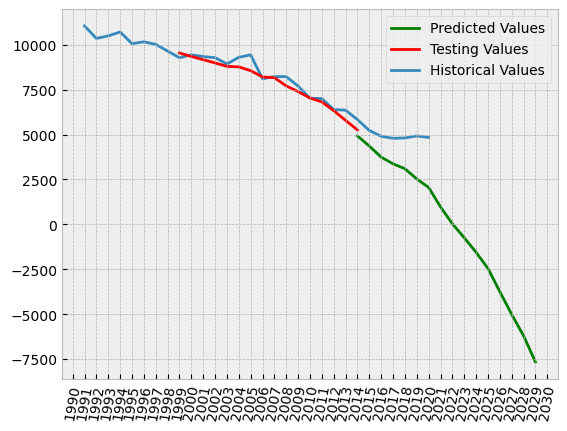

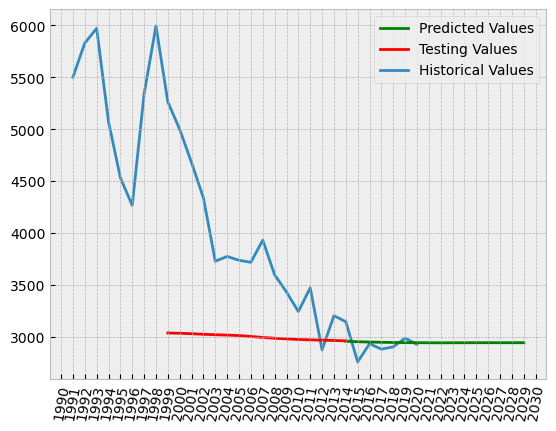

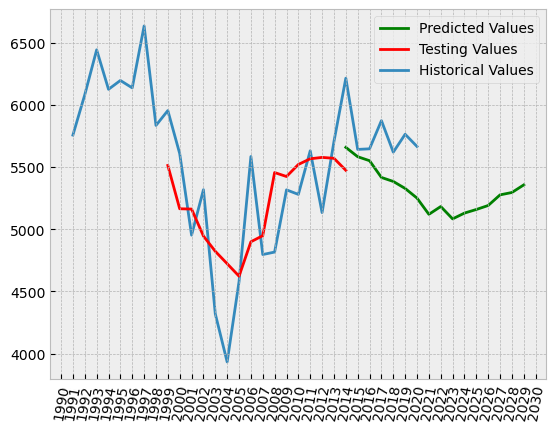

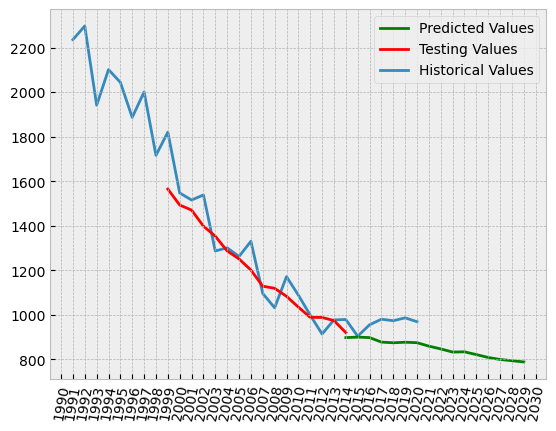

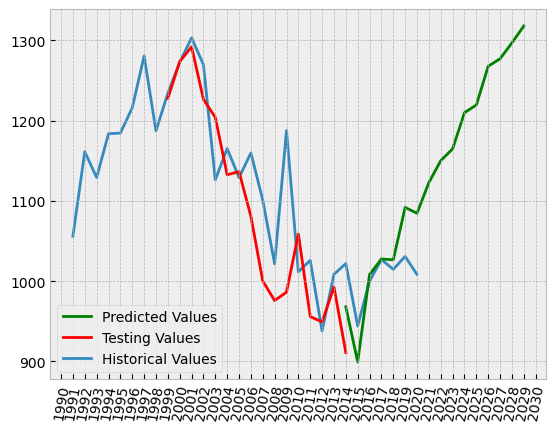

In [25]:
# GHGe
for y in range(0,19):
    next = splitData[y]["x_test"][-1]
    match bestforghge[y]:
        case "LSTM": 
            lmodel = keras.models.load_model(f'savedModels/lstm/{findFolder[y]}/Trial{winners[y] - 1}/model.keras')
            y_pred = lmodel.predict(splitData[y]["x_test"],verbose=0)
            old_pred = lmodel.predict(splitData[y]["x_train"],verbose=0)
        case "SVM": 
            lmodel = load(f'savedModels/svm/{findFolder[y]}/Trial{winners[y] - 1}/model.joblib')
            y_pred = lmodel.predict(splitData[y]["x_test"].reshape(5,9))
            old_pred = lmodel.predict(splitData[y]["x_train"].reshape(16,9)) 
        case _: raise("Update this bit if you're gonna add a new model!")



    for x in range(0,11):
        next = np.append(next,y_pred[-1])
        next = np.delete(next,0).reshape(-1,1)

        match bestforghge[y]:
            case "LSTM": y_pred = np.append(y_pred,lmodel.predict(np.array([next]),verbose=0)).reshape(-1,1)
            case "SVM": y_pred = np.append(y_pred,lmodel.predict(np.array([next]).reshape(1,9))).reshape(-1,1)
            case _: raise("Woops")

    y_test_orig = scaler.inverse_transform(splitData[y]["y_test"].reshape(-1,1))
    y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1,1))
    old_pred_orig = scaler.inverse_transform(old_pred.reshape(-1,1))


    fig,ax = plt.subplots()

    historical = df.iloc[y,:]

    times = df.iloc[0,:].index.tolist() + pd.date_range(start='2020', end='2029', freq='Y').tolist()

    ax.plot(times[-16:], y_pred_orig, color='green', label='Predicted Values',zorder=1)
    ax.plot(historical.iloc[-22:-6].index, old_pred_orig, color='red', label='Testing Values', zorder=1)
    ax.plot(historical.index,historical.values,zorder=-1,label="Historical Values")
    #ax.plot(historical.tail(50).index, y_test_orig, color='orange', label='Actual Values',zorder=0)
    ghgechart.loc[f"g{findFolder[y]}"] = y_pred_orig.reshape(16)
    
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.tick_params(axis='x', rotation=80)
    ax.legend()
    plt.show()

In [26]:
fullpredictions = pd.merge(predictionchart,ghgechart,how="outer")

In [27]:
fullpredictions.index = ["A","B","C","D","E","F","G","H","I","J","K","L","M","gA","gB","gC","gD","gE","gF","gG","gH","gI","gJ","gK","gL","gM","gN","gO","gP","gQ","gR","gS"]

In [28]:
fullpredictions = fullpredictions.iloc[:,14:]

In [29]:
for x in range(0,13):
    for y in range(59,2,-1):
        fullpredictions.iloc[x,y] = np.sum([fullpredictions.iloc[x,y-3:y+1]])
# Get total turnoever in a year, rather then doing GHGe (yearly) / Turnoever (quarterly)
# Noone would forget to add this bit for about a week

In [30]:
fullpredictions = fullpredictions.dropna(axis=1)

In [31]:
fullpredictions.drop("gA",axis=0,inplace=True)
fullpredictions.drop("gB",axis=0,inplace=True)
fullpredictions.drop("gC",axis=0,inplace=True)
fullpredictions.drop("gF",axis=0,inplace=True)
fullpredictions.drop("gO",axis=0,inplace=True)
fullpredictions.drop("gS",axis=0,inplace=True)
print("Done")


#GHGe = Turnover
#A =
#B = 
#C = 
#D = A
#E = B
#F = 
#G = C
#H = D
#I = E
#J = F
#K = G
#L = H
#M = I
#N = J
#O = 
#P = K
#Q = L
#R = M
#S =


Done


In [32]:
fullpredictions.index = ["A","B","C","D","E","F","G","H","I","J","K","L","M","gA","gB","gC","gD","gE","gF","gG","gH","gI","gJ","gK","gL","gM"]

In [61]:
realsectors = ["electricity, gas, steam and air conditioning supply","water supply; sewerage, waste management and remediation activities","wholesale and retail trade; repair of motor vehicles and motorcycles","transport and storage","accommodation and food services","information and communication","financial and insurance activities","real estate activities","professional, scientific and technical activities","administrative and support service activities","education","human health and social work activities","arts, entertainment and recreation"]

In [80]:
from textwrap import fill
# You learn new neat imports every day

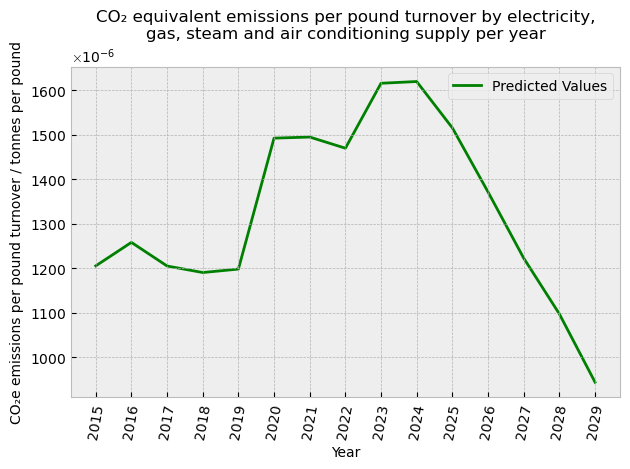

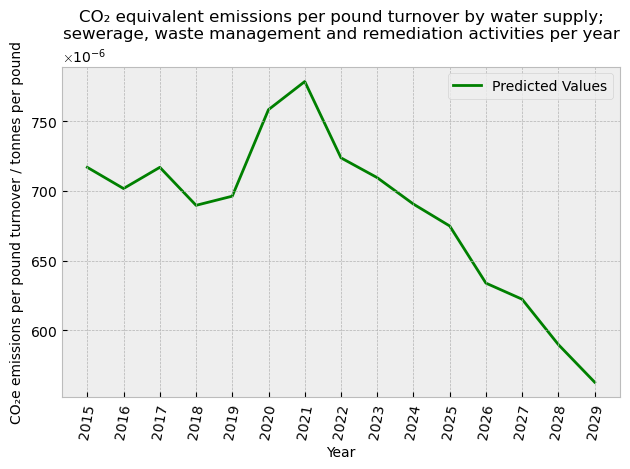

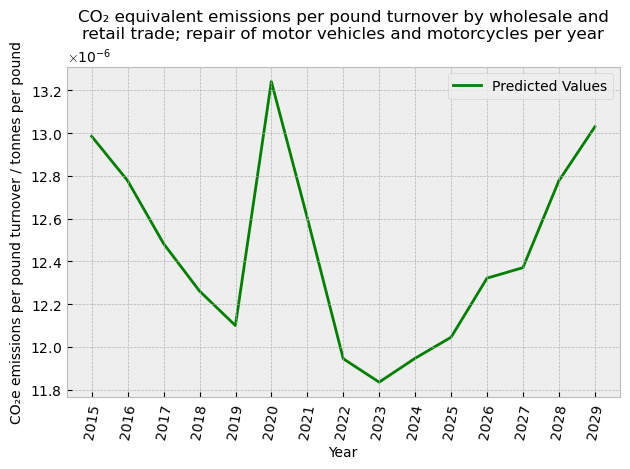

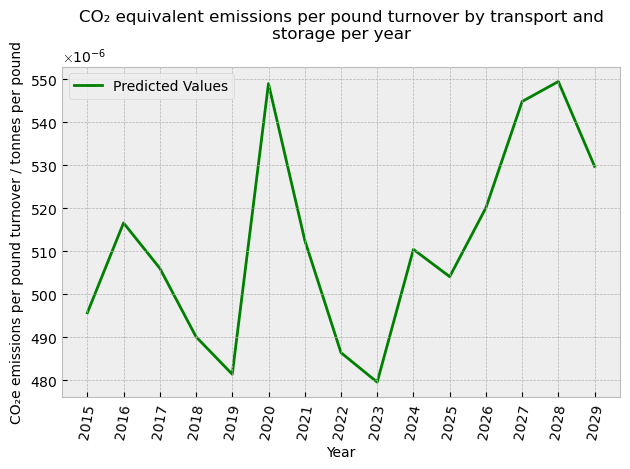

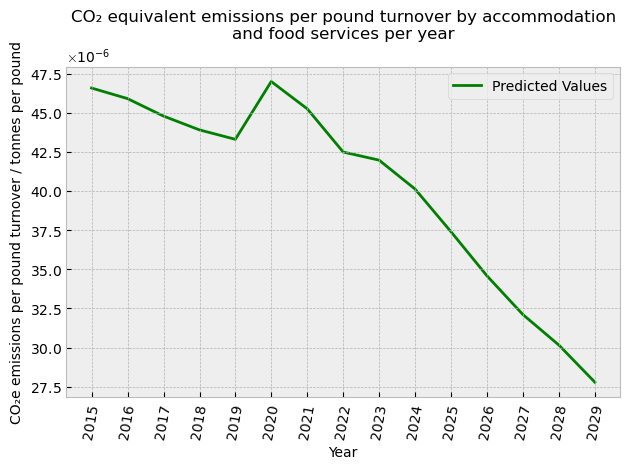

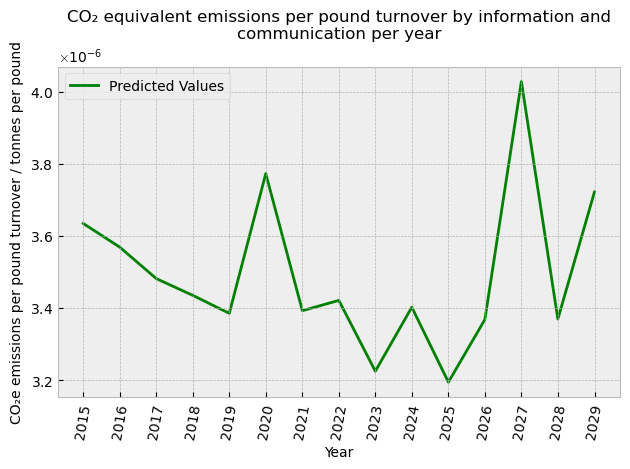

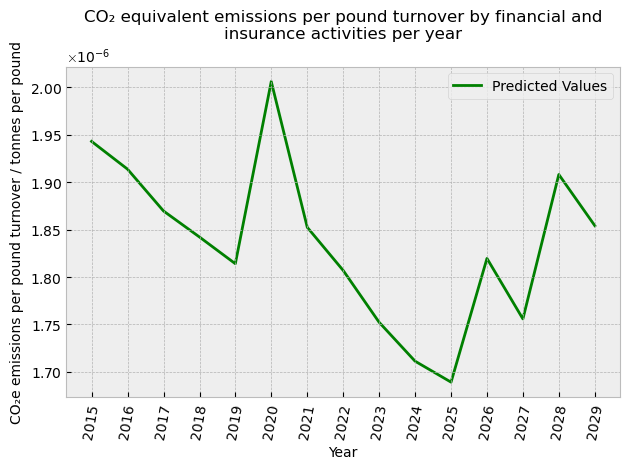

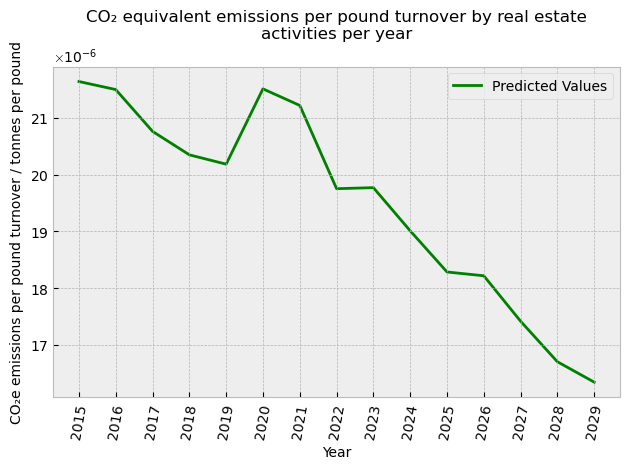

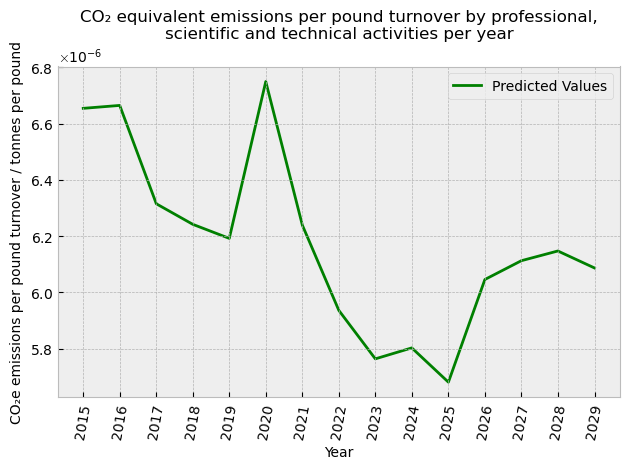

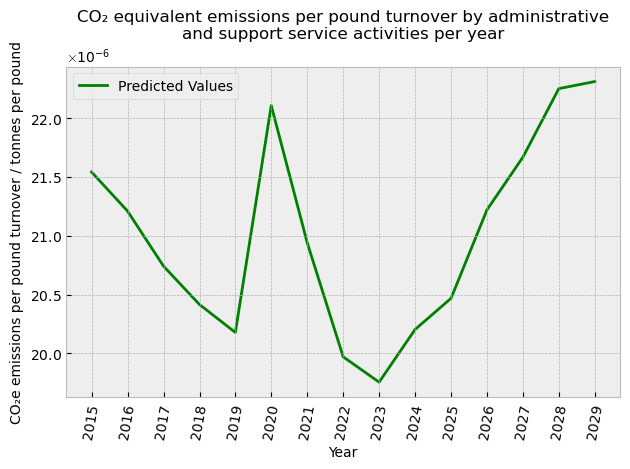

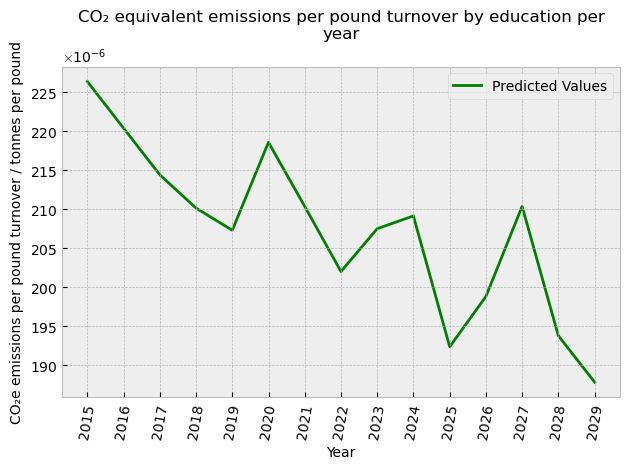

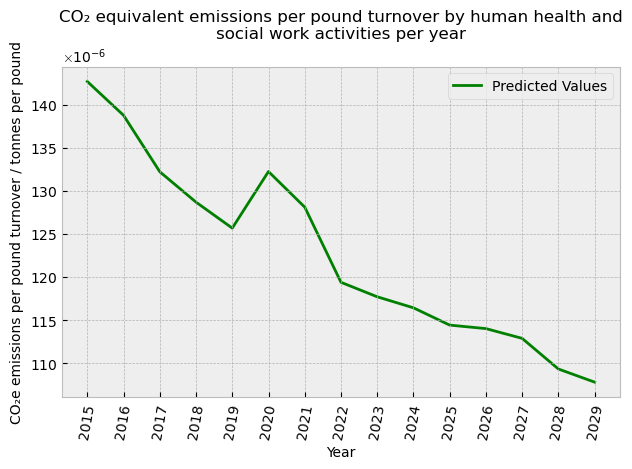

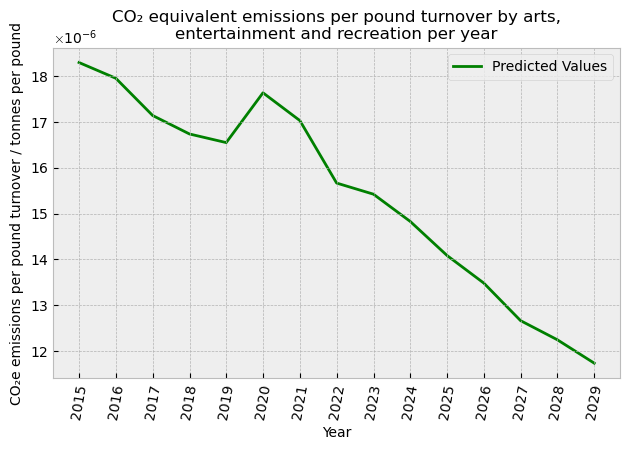

In [91]:
for y in range(0,13):
    plt.rc('axes', labelsize=10) 
    fig,ax = plt.subplots()

    historical = fullpredictions.iloc[y,:]
    
    # Yes I know all of the other graphs being shifted one year forward is annoying, at least I got it fixed for the one that matters the most
    ax.plot(historical.index - pd.DateOffset(years=1), (fullpredictions.loc[f"g{findFolder[y]}",:]/(1000*fullpredictions.loc[findFolder[y],:])), color='green', label='Predicted Values',zorder=1)

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.tick_params(axis='x', rotation=80)

    # Turns out actually labelling your plots is much faster then manually doing it in powerpoint
    ax.axes.ticklabel_format(axis="y",style="sci",scilimits=(-6,-6),useMathText=True)
    ax.axes.set_xlabel("Year")
    ax.axes.set_ylabel("CO₂e emissions per pound turnover / tonnes per pound")

    ax.set_title(fill(f"CO₂ equivalent emissions per pound turnover by {realsectors[y]} per year",63))
    ax.title.set_size(12)

    plt.tight_layout()
    ax.legend()
    plt.show()

In [107]:
maxi = []
mini = []
average = []
for y in range(0,13):
    score = 1e6*(fullpredictions.loc[f"g{findFolder[y]}",:]/(1000*fullpredictions.loc[findFolder[y],:]))
    maxi.append(np.max(score))
    mini.append(np.min(score))
    average.append(np.mean(score))

rankingTable = pd.DataFrame(columns=["Max","Min","Average","Score Peak","Score Min", "Score Average"],index=realsectors)
rankingTable.loc[:,"Max"] = maxi
rankingTable.loc[:,"Min"] = mini
rankingTable.loc[:,"Average"] = average
rankingTable.loc[:,"Score Peak"] = rankingTable.loc[:,"Max"].rank()
rankingTable.loc[:,"Score Min"] = rankingTable.loc[:,"Min"].rank()
rankingTable.loc[:,"Score Average"] = rankingTable.loc[:,"Average"].rank()

rankingTable

Max         Min  \
electricity, gas, steam and air conditioning su...  1619.080395   944.02154   
water supply; sewerage, waste management and re...    778.51449  562.789254   
wholesale and retail trade; repair of motor veh...    13.241496   11.834815   
transport and storage                                549.481916  479.544979   
accommodation and food services                       46.990808   27.787342   
information and communication                          4.027963    3.194344   
financial and insurance activities                     2.006115    1.689213   
real estate activities                                21.642127   16.340187   
professional, scientific and technical activities      6.749106    5.681389   
administrative and support service activities         22.310729   19.755343   
education                                            226.377829  187.861081   
human health and social work activities              142.691992  107.791829   
arts, entertainment and recreation                    18.296588   11.735267   

                                                        Average Score Peak  \
electricity, gas, steam and air conditioning su...  1326.404841       13.0   
water supply; sewerage, waste management and re...   684.392655       12.0   
wholesale and retail trade; repair of motor veh...    12.447988        4.0   
transport and storage                                511.729535       11.0   
accommodation and food services                       40.220184        8.0   
information and communication                          3.493268        2.0   
financial and insurance activities                     1.835939        1.0   
real estate activities                                19.510716        6.0   
professional, scientific and technical activities      6.175546        3.0   
administrative and support service activities         20.998694        7.0   
education                                            207.312255       10.0   
human health and social work activities              122.687208        9.0   
arts, entertainment and recreation                     15.43154        5.0   

                                                   Score Min Score Average  
electricity, gas, steam and air conditioning su...      13.0          13.0  
water supply; sewerage, waste management and re...      12.0          12.0  
wholesale and retail trade; repair of motor veh...       5.0           4.0  
transport and storage                                   11.0          11.0  
accommodation and food services                          8.0           8.0  
information and communication                            2.0           2.0  
financial and insurance activities                       1.0           1.0  
real estate activities                                   6.0           6.0  
professional, scientific and technical activities        3.0           3.0  
administrative and support service activities            7.0           7.0  
education                                               10.0          10.0  
human health and social work activities                  9.0           9.0  
arts, entertainment and recreation                       4.0           5.0